# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
churn = pd.read_csv("/content/BankChurners.csv")

## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [4]:
# Checking the number of rows and columns in the training data
churn.shape

(10127, 21)

###Observations:

*   There are 10127 rows and 21 columns in dataset.



In [5]:
#Creating a copy of dataset
data = churn.copy()

### Displaying the first and last few rows of the dataset

In [6]:
#Checking the first five rows
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [7]:
#Checking the last five rows
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [8]:
#hCecking the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

###Observations:

*   There are 10127 rows and 21 columns in dataset.
*   Value of 15 variables are numerical and 6 are object type.



### Checking for duplicate values

In [9]:
data.duplicated().sum()

0

###Observations:
There is no duplicate value in the dataset.

### Checking for missing values

In [10]:
# Checking for missing values in the data
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


###Observations:

*   There are 1519 values are missing from Education Level column.
*   There are 749 values are missing from Marital Status column.



### Statistical summary of the dataset

In [11]:
#Checking the statistical summery of numerical columns of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


###Observations:
**Customer Age**: The average customer age is approximately 46 years, with a range from 26 to 73 years.

**Dependent Count**: Customers have an average of 2 dependents, ranging from 0 to 5.

**Months on Book**: The average tenure of customers is around 36 months, with a minimum of 13 months and a maximum of 56 months.

**Total Relationship Count**: On average, customers maintain approximately 4 relationships with the bank, with values ranging from 1 to 6.

**Credit Limit**: The average credit limit is around $8,631, with some customers having a minimum limit of $1,438 and a maximum of $34,900.

**Total Revolving Balance**: The average revolving balance is $1,162, with a wide range from $0 to $2,515.

**Average Open to Buy**: Customers on average have $7,469 available to buy, with values ranging from $3 to $34,900.

**Total Transaction Amount**: The total transaction amount averages $4,404, with some customers as low as $510 and others as high as $18,400.

**Total Transaction Count**: On average, customers make 65 transactions, ranging from 10 to 139.

**Utilization Ratio**: The average utilization ratio is around 0.275, indicating moderate credit usage, with values ranging from 0 to 1.

In [12]:
#Checking categorical data distribution
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


###Observations:
**Gender:** There are more Females (F) (5,358) than Males in the dataset.

**Education_Level:** Most customers are Graduates (3,128), but there are some missing values as the total count is only 8,608.

**Marital_Status:** The majority of customers are Married (4,687), with some missing data (total count is 9,378).

**Income_Category:** The largest group of customers falls under the "Less than $40K" income category (3,561 out of 10,127).

**Card_Category:** Most customers hold the "Blue" card (9,436), with other card types being significantly less common.

In [13]:
#Checking unique values of categorical columns
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

###Observations from the Categorical Columns in the Dataset:

- **Attrition_Flag**:  
  - 8,500 customers are categorized as "Existing Customers".  
  - 1,627 customers are labeled as "Attrited Customers".  

- **Gender**:  
  - The dataset includes 5,358 female customers and 4,769 male customers.  

- **Education_Level**:  
  - The majority of customers are either "Graduates" (3,128) or "High School" educated (2,013).  
  - Smaller groups include "Uneducated" (1,487), "College" (1,013), "Post-Graduate" (516), and "Doctorate" (451).  

- **Marital_Status**:  
  - Most customers are "Married" (4,687), followed by "Single" (3,943), and "Divorced" (748).  

- **Income_Category**:  
  - "Less than $40K" is the largest category (3,561 customers).

  - Other notable categories include "$40K - $60K" (1,790), "$80K - $120K" (1,535), and "$60K - $80K" (1,402).  
  
  - Smaller groups include "$120K+" (727), and an ambiguous category labeled as "abc" (1,112 customers).  

- **Card_Category**:  
  - Most customers hold the "Blue" card (9,436 customers).  
  - Other categories include "Silver" (555), "Gold" (116), and "Platinum" (20)

In [14]:
# Dropping CLIENTNUM column
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [15]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis (EDA)

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [17]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [18]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Distribution of Attribution Flag

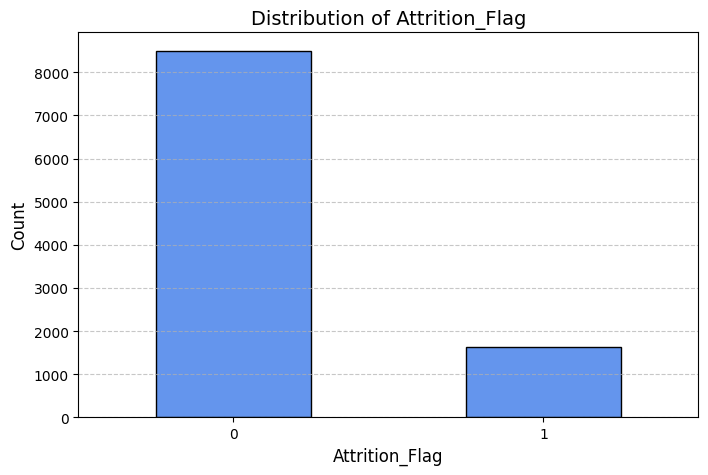

Counts of Attrition_Flag:
Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

Proportions of Attrition_Flag:
Attrition_Flag
0   0.839
1   0.161
Name: count, dtype: float64


In [19]:
# Bar plot for Attrition_Flag
plt.figure(figsize=(8, 5))
attrition_counts = data['Attrition_Flag'].value_counts()
attrition_counts.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Distribution of Attrition_Flag', fontsize=14)
plt.xlabel('Attrition_Flag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)  # Keeps labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display counts and proportions for Attrition_Flag
print("Counts of Attrition_Flag:")
print(attrition_counts)

print("\nProportions of Attrition_Flag:")
print(attrition_counts / len(data))

###Observations:


 **Distribution**:
   - The majority of customers fall under the **Existing Customer** category.
   - A smaller portion belongs to the **Attrited Customer** category.

**Proportions**:
   - Approximately **84%** of the customers are **Existing Customers**.
   - Around **16%** of the customers are **Attrited Customers**.

**Imbalance in Categories**:
   - There is a significant **class imbalance** in the **Attrition_Flag** feature, with most of the customers retaining their accounts.
   - This imbalance might need to be addressed (e.g., through oversampling, undersampling, or class weighting) if used in a predictive model.







###Customer_Age

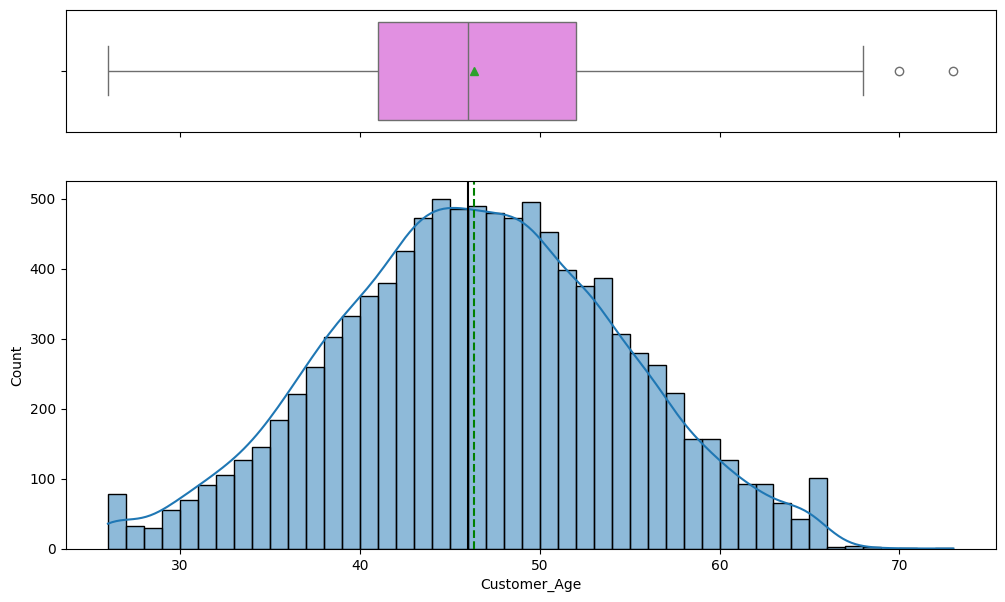

In [20]:
histogram_boxplot(data, "Customer_Age", kde=True)

###Observations from the Histogram and Boxplot of Customer Age:
1. **Distribution**:

- The customer age follows a bell-shaped distribution, with most customers concentrated in the 40-50 age range.

- The distribution shows a slight right skew, indicating a small number of older customers.

2. **Central Tendency**:

- The median age, as shown by the boxplot, is around 46 years, which aligns with the histogram's peak.

3. **Outliers**:

- The boxplot highlights a few outliers above 65 years, indicating some older customers in the dataset.

4. **Spread**:

- The age ranges from approximately 26 to 73 years.
- The interquartile range (IQR) is concentrated between 40 and 50 years, representing the majority of customers.
- These observations suggest that the dataset primarily represents middle-aged customers, with a few younger and older outliers.

###Dependant_Count

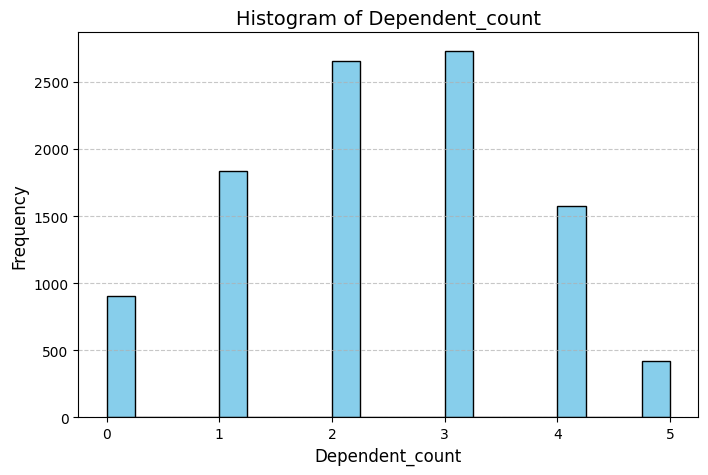

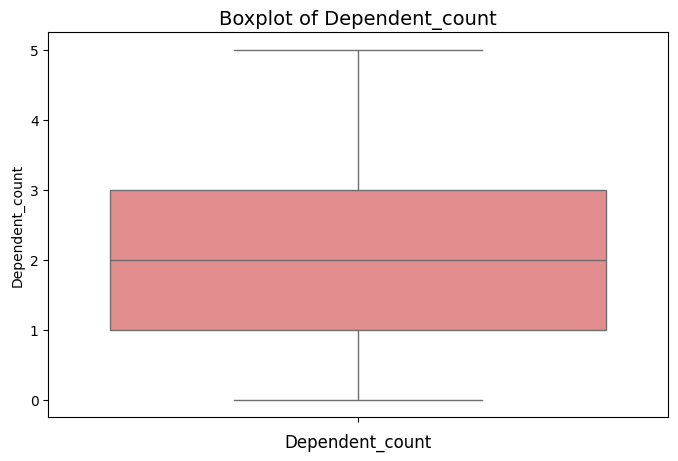

In [21]:
# Histogram for Dependent_count
plt.figure(figsize=(8, 5))
plt.hist(data['Dependent_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Dependent_count', fontsize=14)
plt.xlabel('Dependent_count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Dependent_count
plt.figure(figsize=(8, 5))
sns.boxplot(data['Dependent_count'], color='lightcoral')
plt.title('Boxplot of Dependent_count', fontsize=14)
plt.xlabel('Dependent_count', fontsize=12)
plt.show()

###Observations from the Histogram and Boxplot of Dependent Count:
 **Distribution**:

- The histogram shows a clear pattern where the most frequent dependent counts are 2 and 3.

- Very few customers have 0 or 5 dependents.


 **Central Tendency**:

- The median, as shown in the boxplot, is around 2 dependents, which aligns with the histogram's peak.

**Range**:
- Dependent counts range from 0 to 5, indicating diversity in customer family sizes.

**Outliers**:

- There are no significant outliers in the data, as the boxplot shows all data points within the whiskers.

**Skewness**:

- The data is slightly left-skewed, with fewer customers having higher dependent counts (4 or 5).


###2. What is the distribution of the level of education of customers?

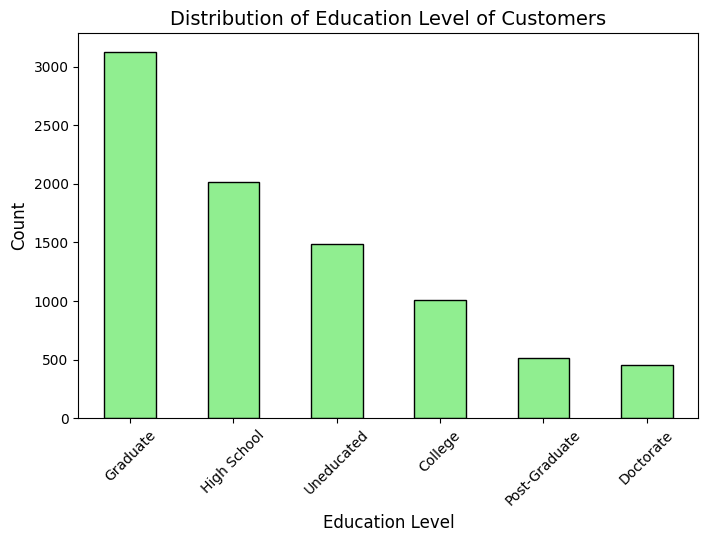

In [22]:
# Bar plot for Education_Level distribution
plt.figure(figsize=(8, 5))
education_counts = data['Education_Level'].value_counts()
education_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribution of Education Level of Customers', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

###Distribution of the Level of Education of Customers:
**Graduate**: The largest group, with 3,128 customers, indicating a significant portion of the customer base is well-educated.

**High School**: The second-largest group, with 2,013 customers.

**Uneducated**: A notable portion of customers, with 1,487 falling into this category.

**College**: 1,013 customers, a smaller but substantial segment.

**Post-Graduate**: 516 customers, representing a specialized, higher-education group.

**Doctorate**: The smallest group, with 451 customers.

This distribution highlights that the majority of customers have a formal education level ranging from high school to graduate degrees.

###Marital_Status

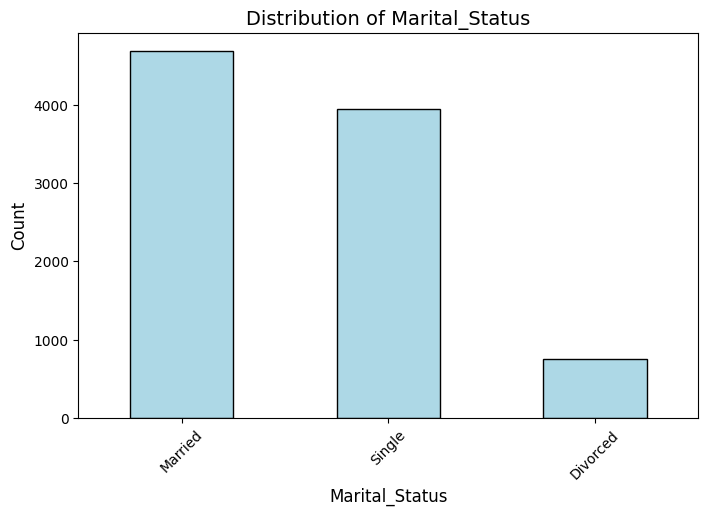

In [23]:
# Bar plot for Marital_Status
plt.figure(figsize=(8, 5))
marital_status_counts = data['Marital_Status'].value_counts()
marital_status_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of Marital_Status', fontsize=14)
plt.xlabel('Marital_Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

###Distribution of Marital Status of Customers:
**Married**: The largest group, with 4,687 customers, making up a significant portion of the customer base.

**Single**: The second-largest group, with 3,943 customers.

**Divorced**: A smaller segment, with 748 customers.

This distribution shows that the majority of customers are either married or single, with divorced customers representing a relatively small proportion.

###3. What is the distribution of the level of income of customers?

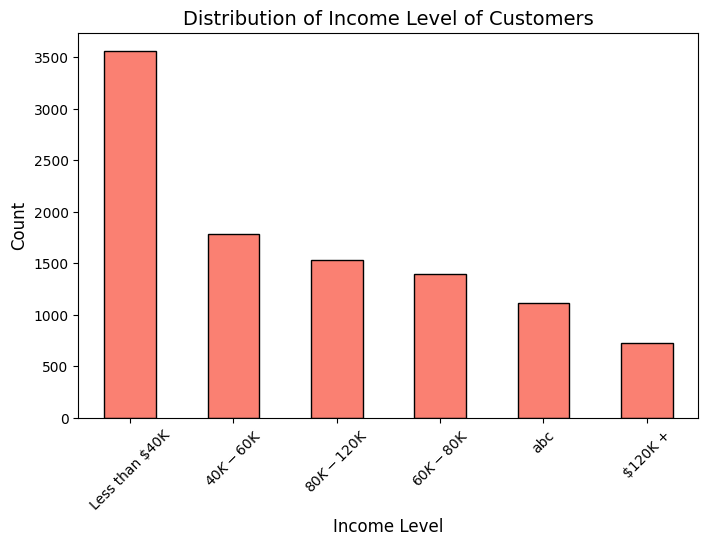

In [25]:
# Bar plot for Income_Category distribution
plt.figure(figsize=(8, 5))
income_counts = data['Income_Category'].value_counts()
income_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Income Level of Customers', fontsize=14)
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

###Distribution of Income Level of Customers:

**Less than  40K**:The largest group,with 3,561 customers,indicating a significant portion of the customer base earns less than 40K annually.

**40K - 60K**: The second-largest group, with 1,790 customers.

**80K− 120K**: A notable segment, with 1,535 customers.

**60K− 80K**: Includes 1,402 customers, slightly smaller than the previous income group.

**Ambiguous Category ("abc")**: Includes 1,112 customers, which may need clarification or correction in the dataset.

**$120K+**: The smallest group, with 727 customers, representing high-income earners.
This distribution highlights that most customers fall into lower or middle-income categories, with fewer high-income earners.

###Months_on_book

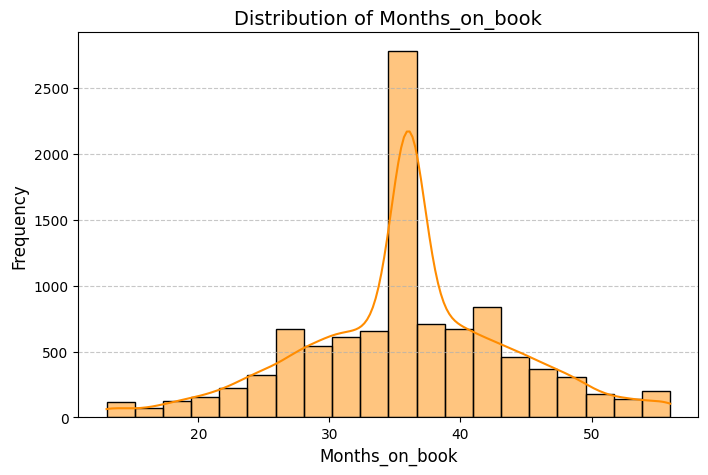

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(data['Months_on_book'], bins=20, kde=True, color='darkorange', edgecolor='black')
plt.title('Distribution of Months_on_book', fontsize=14)
plt.xlabel('Months_on_book', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Observations:
- The distribution of **Months_on_book** is approximately normal, with a peak around **36 months**, making it the most common tenure.  
- Customer tenures range between **20 and 60 months**, indicating a diverse spread in the dataset.  
- A slight skew toward longer tenures suggests a small group of customers with extended relationships with the bank.  
- The majority of customers fall within a moderate tenure range, highlighting stable account maintenance over time.  

###Total_Relationship_Count

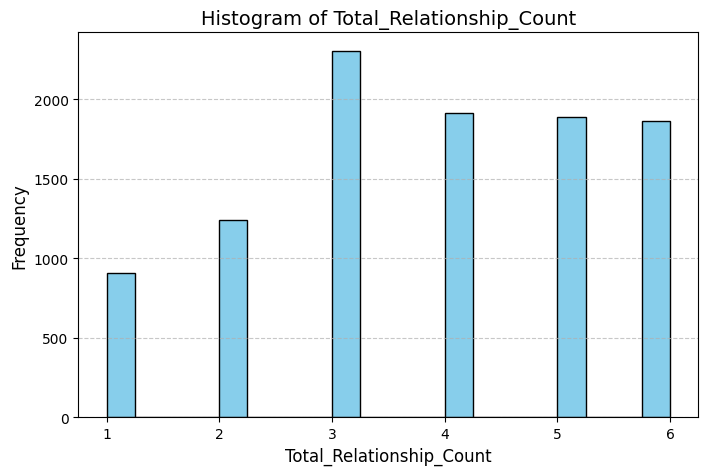

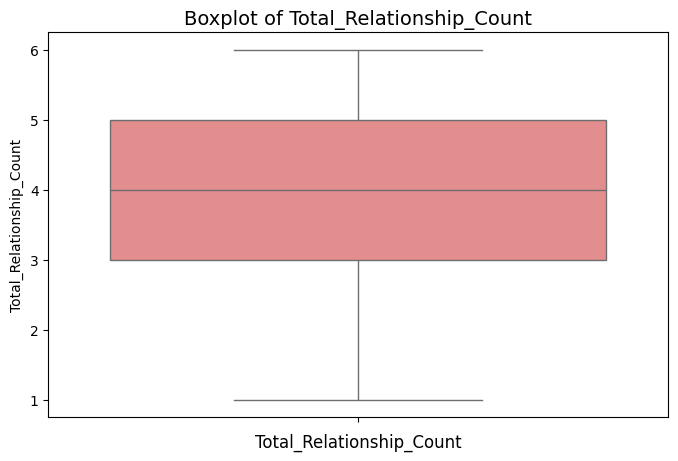

In [27]:
# Histogram for Total_Relationship_Count
plt.figure(figsize=(8, 5))
plt.hist(data['Total_Relationship_Count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total_Relationship_Count', fontsize=14)
plt.xlabel('Total_Relationship_Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Total_Relationship_Count
plt.figure(figsize=(8, 5))
sns.boxplot(data['Total_Relationship_Count'], color='lightcoral')
plt.title('Boxplot of Total_Relationship_Count', fontsize=14)
plt.xlabel('Total_Relationship_Count', fontsize=12)
plt.show()

###Distribution of Total_Relationship_Count:
**Histogram Observations**:

- The distribution shows that the majority of customers maintain 3 to 5 relationships with the bank.

- The count peaks around 4 relationships and declines for higher or lower counts.
- Few customers have only 1 or 6 relationships.

**Boxplot Observations**:

- The median is 4 relationships, indicating that half of the customers maintain 4 or fewer relationships.

- The interquartile range (IQR) is between 3 and 5 relationships.
No apparent outliers are observed in the data.

This analysis indicates that most customers engage in a moderate level of interaction with the bank, maintaining between 3 and 5 relationships.

###	Months_Inactive_12_mon

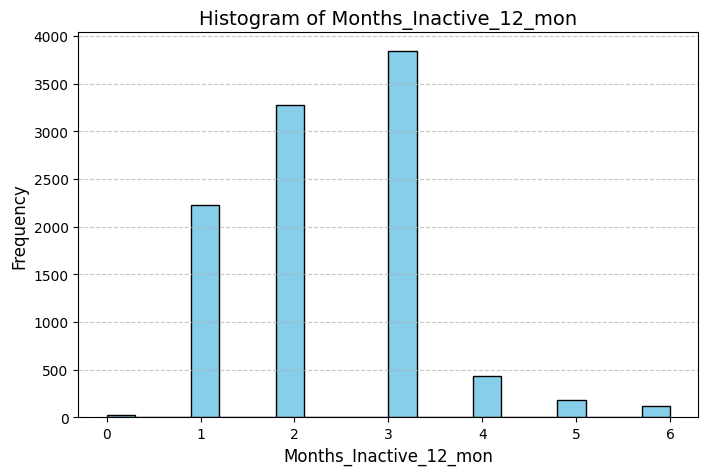

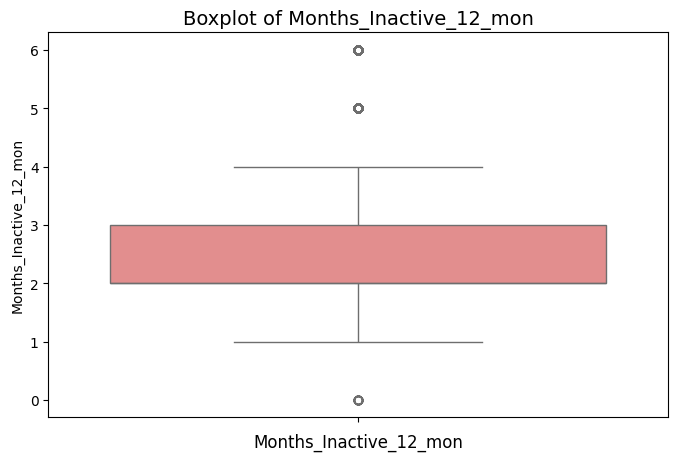

In [28]:
# Histogram for Months_Inactive_12_mon
plt.figure(figsize=(8, 5))
plt.hist(data['Months_Inactive_12_mon'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Months_Inactive_12_mon', fontsize=14)
plt.xlabel('Months_Inactive_12_mon', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Months_Inactive_12_mon
plt.figure(figsize=(8, 5))
sns.boxplot(data['Months_Inactive_12_mon'], color='lightcoral')
plt.title('Boxplot of Months_Inactive_12_mon', fontsize=14)
plt.xlabel('Months_Inactive_12_mon', fontsize=12)
plt.show()

###Observations for Months_Inactive_12_mon:
**Histogram Observations**:

- The majority of customers have been inactive for 2 or 3 months in the past 12 months, with the highest frequency around 2 months.
- Very few customers have been inactive for 0, 5, or 6 months.

**Boxplot Observations**:
- The median inactivity is 2 months.
- The interquartile range (IQR) spans from 2 to 3 months, covering the majority of the data.
- Outliers are observed at 0, 5, and 6 months, indicating a small number of customers with either no inactivity or extended periods of inactivity.

**Skewness**:

- The data is slightly left-skewed, with a concentration in the lower range of inactivity.

These observations highlight that most customers exhibit moderate inactivity levels, with a few outliers having extended or no inactivity. This insight could be useful for customer engagement or retention strategies.

###Contacts_Count_12_mon

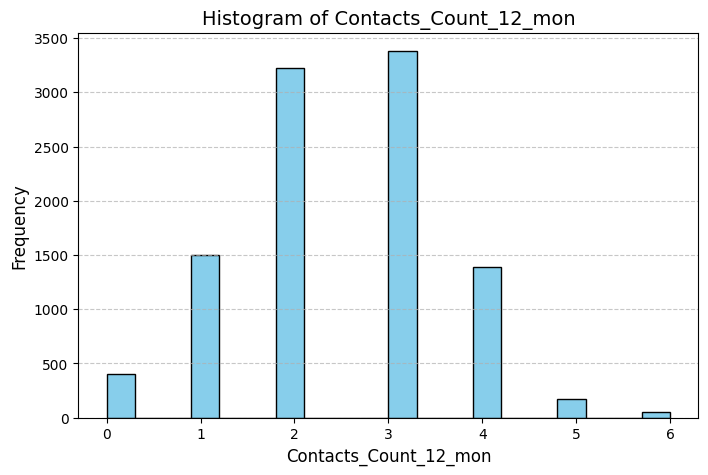

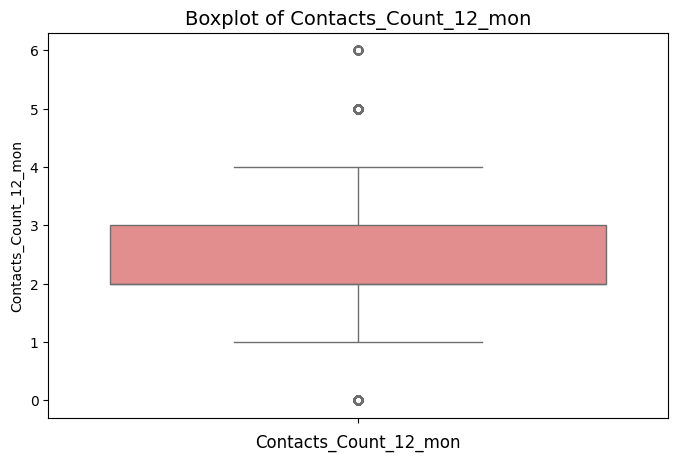

In [29]:
# Histogram for Contacts_Count_12_mon
plt.figure(figsize=(8, 5))
plt.hist(data['Contacts_Count_12_mon'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Contacts_Count_12_mon', fontsize=14)
plt.xlabel('Contacts_Count_12_mon', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Contacts_Count_12_mon
plt.figure(figsize=(8, 5))
sns.boxplot(data['Contacts_Count_12_mon'], color='lightcoral')
plt.title('Boxplot of Contacts_Count_12_mon', fontsize=14)
plt.xlabel('Contacts_Count_12_mon', fontsize=12)
plt.show()

###Observations for Contacts_Count_12_mon:
**Histogram Observations**:

- The majority of customers contacted the bank 2 to 3 times in the past 12 months, with the highest frequency at 3 contacts.
- Very few customers had 0, 5, or 6 contacts in the last 12 months.

**Boxplot Observations**:

- The median number of contacts is 2 contacts per year.
- The interquartile range (IQR) spans 2 to 3 contacts, which represents the majority of customers.
- There are outliers observed at 0, 5, and 6 contacts, indicating some customers with exceptionally high or low levels of interaction.

**Skewness**:

- The data is slightly right-skewed, with a small number of customers having high contact frequencies.

These insights suggest that most customers have moderate interaction with the bank, with a small number either very engaged or disengaged. This information could be useful for understanding customer behavior and tailoring communication strategies.

###13.	Credit_Limit

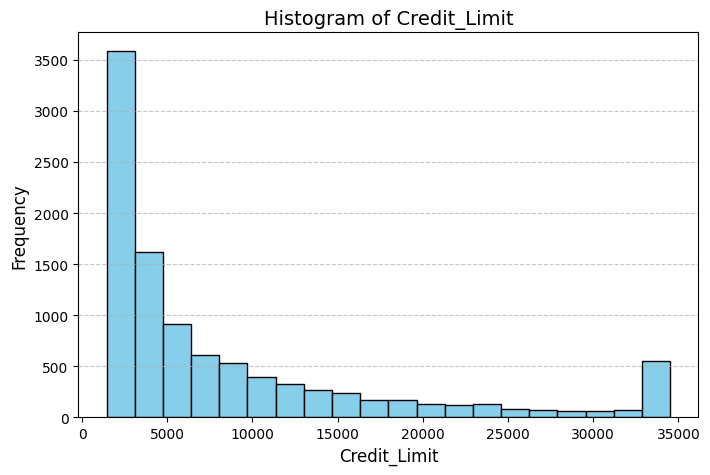

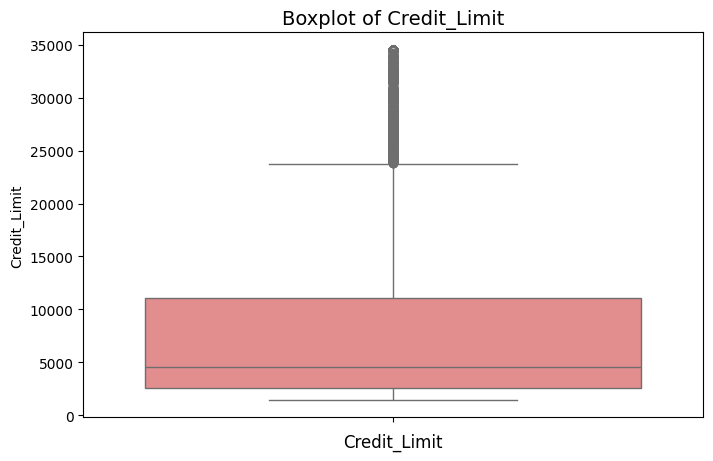

In [30]:
# Histogram for Credit_Limit
plt.figure(figsize=(8, 5))
plt.hist(data['Credit_Limit'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Credit_Limit', fontsize=14)
plt.xlabel('Credit_Limit', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Credit_Limit
plt.figure(figsize=(8, 5))
sns.boxplot(data['Credit_Limit'], color='lightcoral')
plt.title('Boxplot of Credit_Limit', fontsize=14)
plt.xlabel('Credit_Limit', fontsize=12)
plt.show()

###Observations for Credit_Limit:
**Histogram Observations**:

- The distribution is heavily right-skewed, with most customers having credit limits below 10,000.
- There is a significant concentration around the lower range, with fewer customers having higher credit limits.

**Boxplot Observations**:

- The median credit limit is approximately 8,500.
- The interquartile range (IQR) spans from around 5,000 to 11,500.
- There are a substantial number of outliers, with credit limits exceeding 25,000.

**Skewness**:

- The right skew indicates that while most customers have moderate credit limits, a small number of customers have exceptionally high limits (outliers).

These observations suggest that most customers fall into the mid-to-lower credit limit range, with a small elite segment having very high credit limits. This insight could help in identifying target groups for specific credit-related strategies or policies.

###Total Revolving Balance

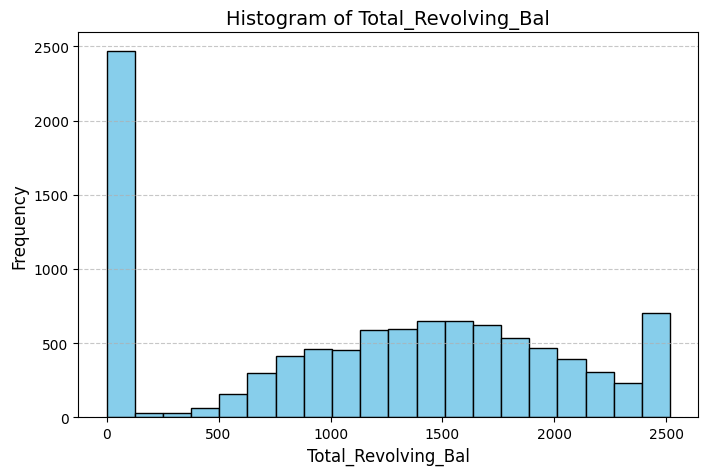

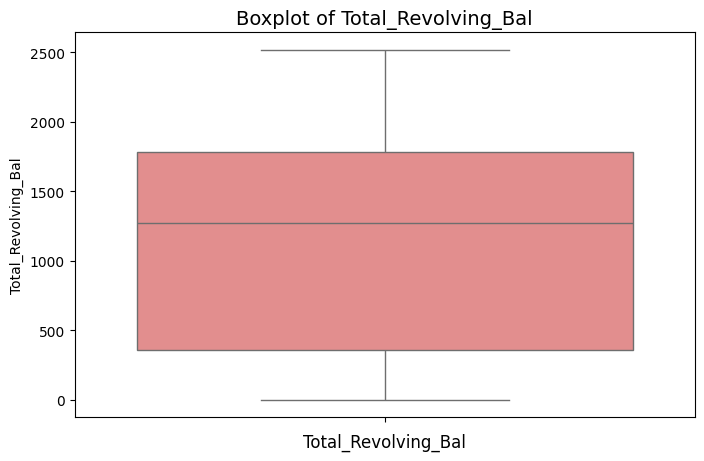

In [31]:
# Histogram for Total_Revolving_Bal
plt.figure(figsize=(8, 5))
plt.hist(data['Total_Revolving_Bal'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total_Revolving_Bal', fontsize=14)
plt.xlabel('Total_Revolving_Bal', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Total_Revolving_Bal
plt.figure(figsize=(8, 5))
sns.boxplot(data['Total_Revolving_Bal'], color='lightcoral')
plt.title('Boxplot of Total_Revolving_Bal', fontsize=14)
plt.xlabel('Total_Revolving_Bal', fontsize=12)
plt.show()

###Observations for Total_Revolving_Bal:
**Histogram Observations**:

- A significant number of customers have a revolving balance of 0, indicating they do not carry a balance on their accounts.
- Beyond 0, the distribution is approximately uniform, with balances spread fairly evenly between 500 and 2,500.

**Boxplot Observations**:

- The median revolving balance is approximately 1,200.
- The interquartile range (IQR) spans from around 500 to 1,800.
- There are no significant outliers, as most data points fall within the expected range.

**Skewness**:

- The histogram shows a left skew due to the large number of customers with a revolving balance of 0.

These observations indicate that many customers either pay off their balances regularly (resulting in a revolving balance of 0) or carry balances distributed across a moderate range.

###Average Open to Buy

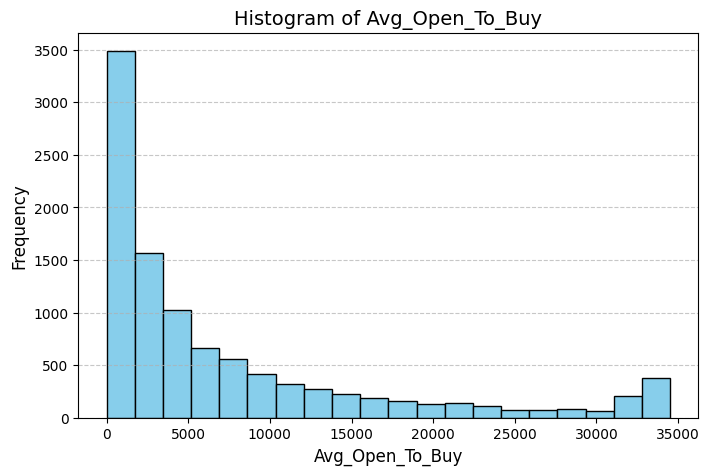

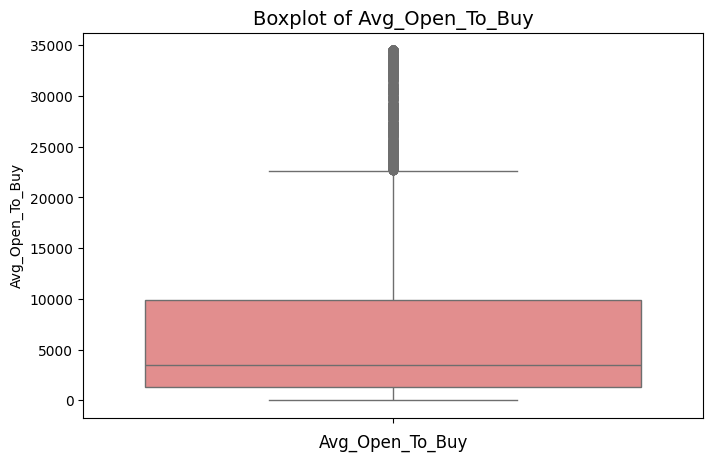

In [32]:
# Histogram for Avg_Open_To_Buy
plt.figure(figsize=(8, 5))
plt.hist(data['Avg_Open_To_Buy'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Avg_Open_To_Buy', fontsize=14)
plt.xlabel('Avg_Open_To_Buy', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Avg_Open_To_Buy
plt.figure(figsize=(8, 5))
sns.boxplot(data['Avg_Open_To_Buy'], color='lightcoral')
plt.title('Boxplot of Avg_Open_To_Buy', fontsize=14)
plt.xlabel('Avg_Open_To_Buy', fontsize=12)
plt.show()

###Observations for Avg_Open_To_Buy:
**Histogram Observations**:

- The majority of customers have an average open-to-buy limit below 10,000, with a sharp concentration in the lower range.
- There are a smaller number of customers with limits approaching the maximum of 35,000, creating a right-skewed distribution.

**Boxplot Observations**:

- The median open-to-buy limit is approximately 7,500.
- The interquartile range (IQR) spans from around 4,000 to 11,000, covering most customers.
- Significant outliers exist for higher limits exceeding 25,000.

**Skewness**:

- The distribution is heavily right-skewed due to a smaller number of customers having exceptionally high open-to-buy limits.

These observations indicate that most customers have moderate purchasing power, with a few outliers representing customers with higher credit availability. This insight could help identify potential high-value customers or assess risk levels.

###Total_Amt_Chng_Q4_Q1

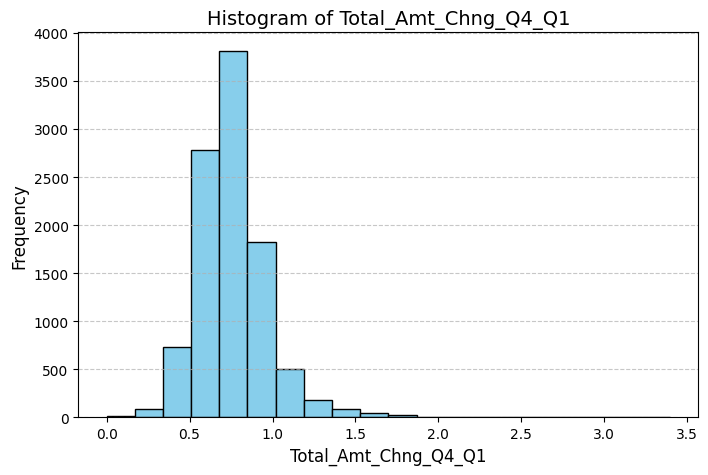

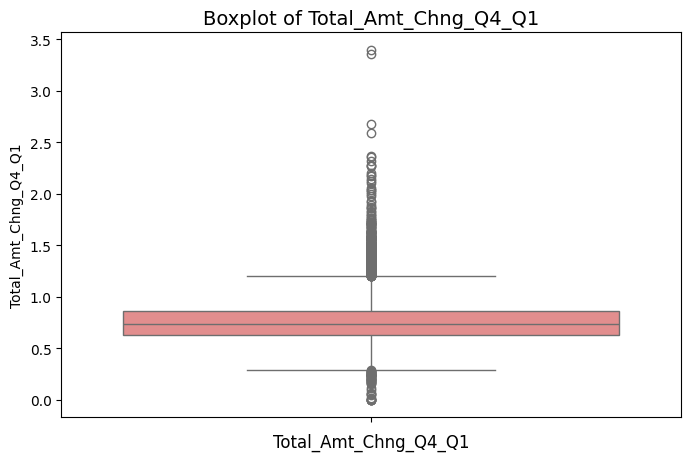

In [33]:
# Histogram for Total_Amt_Chng_Q4_Q1
plt.figure(figsize=(8, 5))
plt.hist(data['Total_Amt_Chng_Q4_Q1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total_Amt_Chng_Q4_Q1', fontsize=14)
plt.xlabel('Total_Amt_Chng_Q4_Q1', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Total_Amt_Chng_Q4_Q1
plt.figure(figsize=(8, 5))
sns.boxplot(data['Total_Amt_Chng_Q4_Q1'], color='lightcoral')
plt.title('Boxplot of Total_Amt_Chng_Q4_Q1', fontsize=14)
plt.xlabel('Total_Amt_Chng_Q4_Q1', fontsize=12)
plt.show()

###Observations for Total_Amt_Chng_Q4_Q1:
**Histogram Observations**:

- The majority of customers have a Total_Amt_Chng_Q4_Q1 value between 0.5 and 1.0, with the peak around 0.7-0.8.
- The distribution tapers off quickly after 1.0, with very few customers having values greater than 2.0.

**Boxplot Observations**:

- The median value is approximately 0.8.
- The interquartile range (IQR) spans from 0.6 to 1.0, covering most customers.
- There are significant outliers with values exceeding 2.0, indicating a small group of customers with exceptionally high changes in transaction amounts.

**Skewness**:

- The distribution shows a slight right skew, with a tail of higher values representing outliers.

These observations suggest that most customers have moderate changes in their transaction amounts between Q4 and Q1, with a small segment experiencing significantly higher fluctuations. This could be an area for further analysis to understand patterns in customer behavior.

###1. How is the total transaction amount distributed?

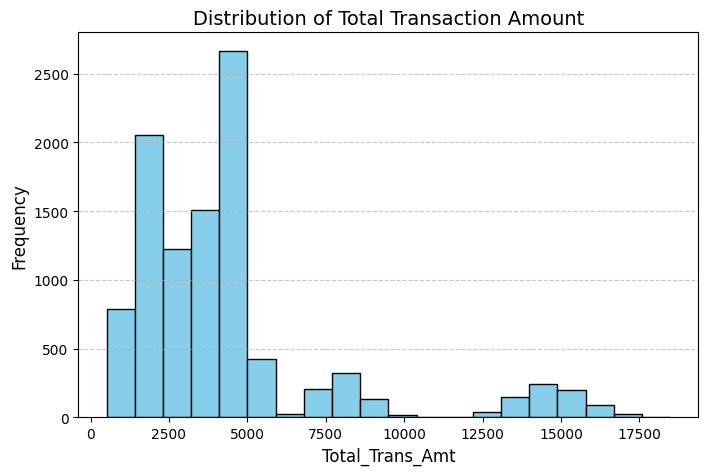

In [34]:
# Histogram to check distribution of Total_Trans_Amt
plt.figure(figsize=(8, 5))
plt.hist(data['Total_Trans_Amt'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Transaction Amount', fontsize=14)
plt.xlabel('Total_Trans_Amt', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Observations for Total Transaction Amount (Total_Trans_Amt):
**Distribution**:

- The distribution is right-skewed, with the majority of customers having a total transaction amount between 2,000 and 5,000.

- A significant number of customers have transaction amounts clustered between 4,000 and 5,000, representing the peak of the histogram.

- There is a smaller group of customers with significantly higher transaction amounts exceeding 10,000, forming the right tail of the distribution.

These observations suggest that most customers transact moderately, with a few high-value customers exhibiting larger transaction volumes. This could be helpful for segmenting customer groups based on transaction behavior.

###Total_Trans_Ct

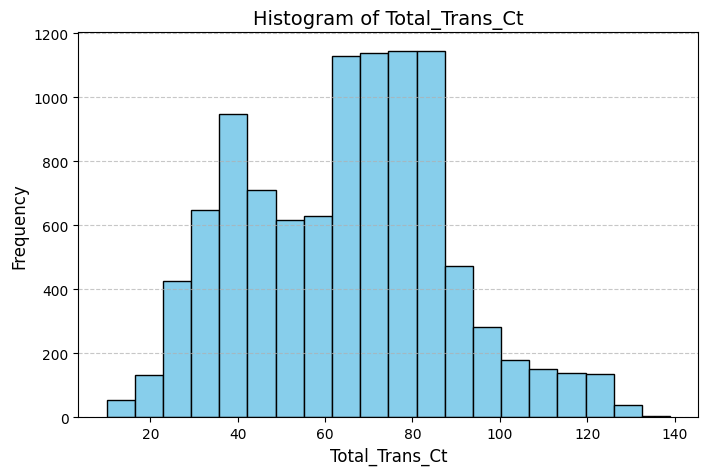

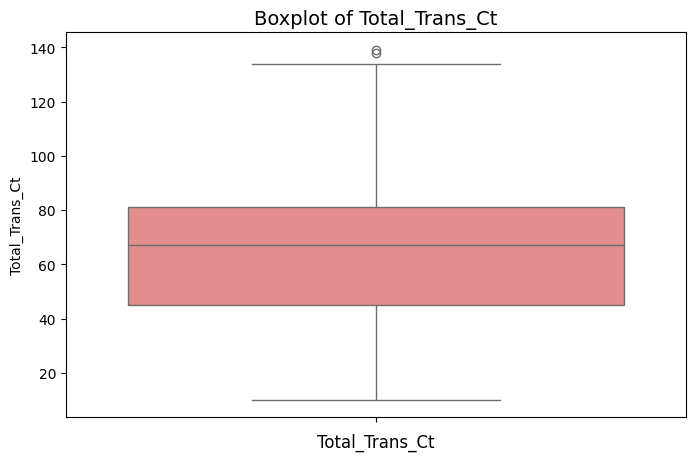

In [35]:
# Histogram for Total_Trans_Ct
plt.figure(figsize=(8, 5))
plt.hist(data['Total_Trans_Ct'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total_Trans_Ct', fontsize=14)
plt.xlabel('Total_Trans_Ct', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Total_Trans_Ct
plt.figure(figsize=(8, 5))
sns.boxplot(data['Total_Trans_Ct'], color='lightcoral')
plt.title('Boxplot of Total_Trans_Ct', fontsize=14)
plt.xlabel('Total_Trans_Ct', fontsize=12)
plt.show()

###Observations for Total_Trans_Ct (Total Transaction Count):
**Histogram Observations**:

- The majority of customers make 40 to 80 transactions in a given period, with the highest frequency around 60 to 70 transactions.
- The distribution is slightly right-skewed, with a few customers making very high numbers of transactions exceeding 100.

**Boxplot Observations**:

- The median transaction count is approximately 65 transactions.
- The interquartile range (IQR) spans from 50 to 80 transactions, indicating that most customers fall within this range.
- A small number of outliers exist, with transaction counts exceeding 120.

**Customer Behavior**:

- The right skew indicates that while most customers transact moderately, a few are highly active in terms of transaction frequency.

These insights highlight the typical transaction behavior of customers and suggest that a small group of highly active customers could be driving significant engagement.

###Total_Ct_Chng_Q4_Q1

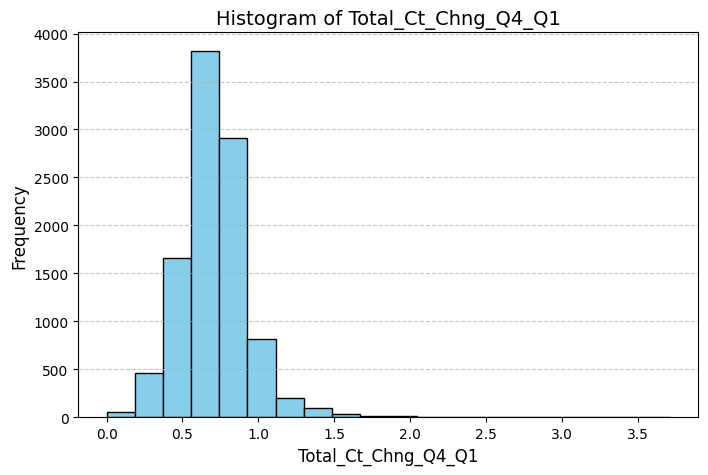

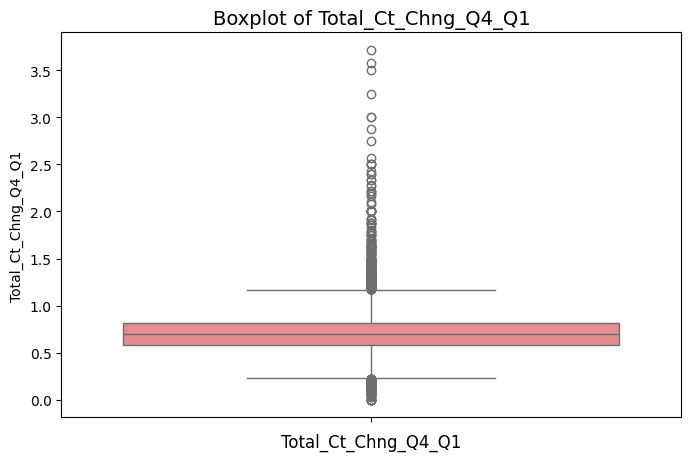

In [36]:
# Histogram for Total_Ct_Chng_Q4_Q1
plt.figure(figsize=(8, 5))
plt.hist(data['Total_Ct_Chng_Q4_Q1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Total_Ct_Chng_Q4_Q1', fontsize=14)
plt.xlabel('Total_Ct_Chng_Q4_Q1', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Total_Ct_Chng_Q4_Q1
plt.figure(figsize=(8, 5))
sns.boxplot(data['Total_Ct_Chng_Q4_Q1'], color='lightcoral')
plt.title('Boxplot of Total_Ct_Chng_Q4_Q1', fontsize=14)
plt.xlabel('Total_Ct_Chng_Q4_Q1', fontsize=12)
plt.show()

###Observations for Total_Ct_Chng_Q4_Q1:
**Histogram Observations**:

- The majority of customers exhibit a change in transaction count between 0.5 and 1.0.
- The distribution is right-skewed, with fewer customers having values exceeding 1.0.

**Boxplot Observations**:

- The median change in transaction count is around 0.7.
- The interquartile range (IQR) spans from 0.6 to 0.9, indicating that most customers fall within this range.
- A significant number of outliers are observed with values exceeding 1.5, and a few extreme cases are above 2.5.

**Skewness**:

- The right skew highlights that most customers exhibit moderate changes in transaction count, with a small group showing higher fluctuations.

These insights suggest that while most customers have stable changes in transaction behavior, the outliers might represent customers with notable variations that could require further investigation.

###Average_Utilization_Ratio

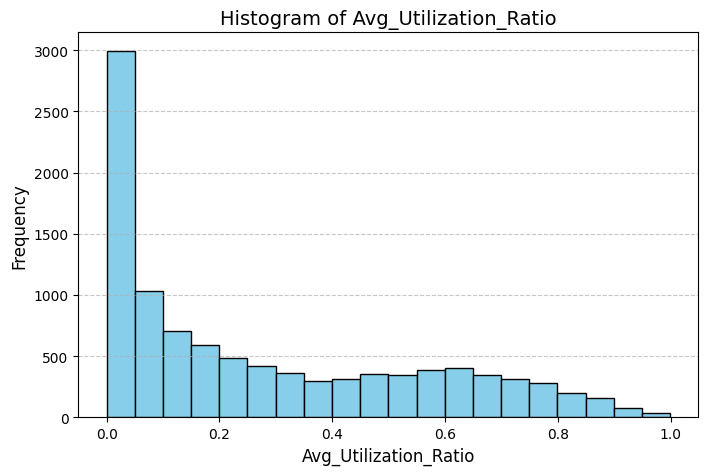

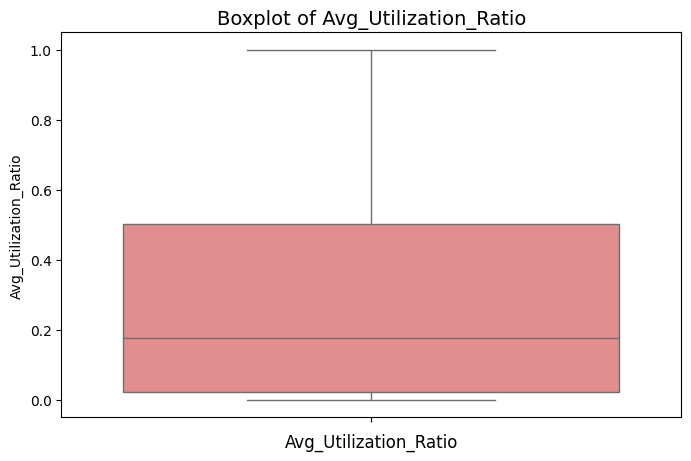

In [37]:
# Histogram for Avg_Utilization_Ratio
plt.figure(figsize=(8, 5))
plt.hist(data['Avg_Utilization_Ratio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Avg_Utilization_Ratio', fontsize=14)
plt.xlabel('Avg_Utilization_Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot for Avg_Utilization_Ratio
plt.figure(figsize=(8, 5))
sns.boxplot(data['Avg_Utilization_Ratio'], color='lightcoral')
plt.title('Boxplot of Avg_Utilization_Ratio', fontsize=14)
plt.xlabel('Avg_Utilization_Ratio', fontsize=12)
plt.show()

###Observations for Avg_Utilization_Ratio:
**Histogram Observations**:

- The majority of customers have an average utilization ratio clustered around 0 to 0.2, indicating low credit utilization.
- The distribution is heavily right-skewed, with fewer customers having higher utilization ratios approaching 1.0.

**Boxplot Observations**:

- The median utilization ratio is approximately 0.2.
- The interquartile range (IQR) spans from 0.0 to 0.4, covering most of the customers.
- There are no significant outliers observed, as most data points fall within the expected range.

**Skewness**:

- The right-skewed distribution highlights that while most customers maintain low credit utilization, some customers make full use of their available credit.

These insights suggest that a large proportion of customers are cautious in utilizing their credit, with a small subset using a significant portion of their credit limit. This behavior could be critical in identifying potential risk or understanding customer spending habits.

###Card_Category

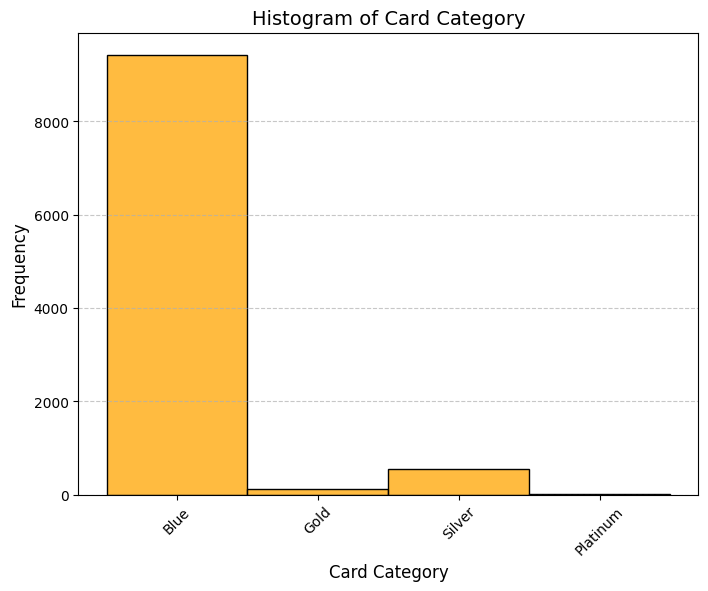

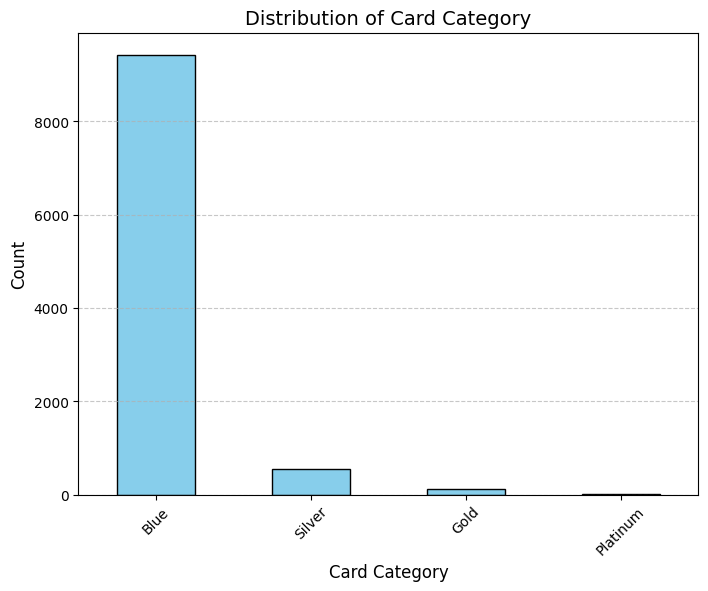

In [38]:
# Recalculate card_category_counts
card_category_counts = data['Card_Category'].value_counts()

# Histogram for 'Card_Category'
plt.figure(figsize=(8, 6))
sns.histplot(data['Card_Category'], bins=len(card_category_counts), kde=False, color='orange', edgecolor='black')
plt.title('Histogram of Card Category', fontsize=14)
plt.xlabel('Card Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar plot for 'Card_Category'
plt.figure(figsize=(8, 6))
card_category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Card Category', fontsize=14)
plt.xlabel('Card Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Observations for Card Category Analysis:

- The "Blue" card category is the most prevalent among customers, indicating it is likely the standard or most accessible card option.

- "Silver," "Gold," and "Platinum" card categories have significantly fewer customers, suggesting these may be premium or less commonly selected card options.

- The distribution of card categories is highly imbalanced, with the majority concentrated in the "Blue" category, while other categories have minimal representation.

##Bivariate Analysis


###4. How does the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)?

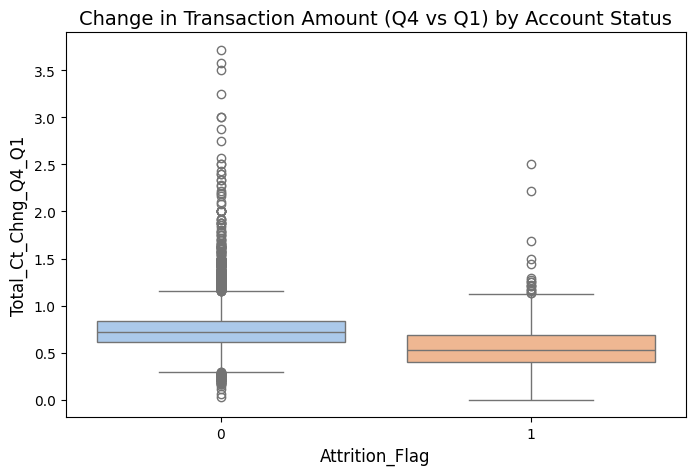

In [39]:
# Boxplot for Total_Ct_Chng_Q4_Q1 by Attrition_Flag
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1', palette='pastel')
plt.title('Change in Transaction Amount (Q4 vs Q1) by Account Status', fontsize=14)
plt.xlabel('Attrition_Flag', fontsize=12)
plt.ylabel('Total_Ct_Chng_Q4_Q1', fontsize=12)
plt.show()

###Observations for Change in Transaction Amount (Q4 vs Q1) by Account Status (Attrition_Flag):
**Existing Customers**:

- Median change in transaction count is higher for Existing Customers compared to attrited ones.
- The interquartile range (IQR) is broader, suggesting more variability among existing customers.
- There are a significant number of outliers, with some existing customers showing very high changes (values exceeding 2.5).

**Attrited Customers**:

- Median change in transaction count is lower compared to existing customers.
- The IQR is narrower, indicating less variability in transaction changes among attrited customers.
- Fewer outliers are observed, and most values are concentrated around lower transaction changes.

**Comparison**:

- Existing customers generally have higher and more varied changes in transaction amounts, which may indicate greater engagement or fluctuations in behavior.
- Attrited customers show more stability but at lower levels, potentially reflecting disengagement before attrition.

This analysis suggests that the transaction activity change could be an important indicator of customer engagement and retention.

###5. How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?

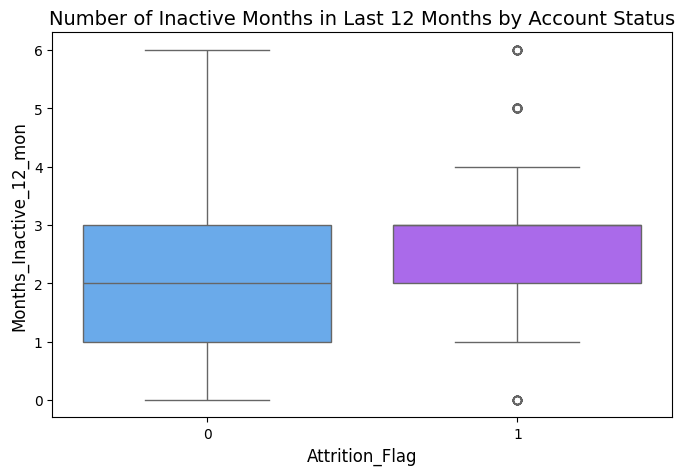

In [40]:
# Boxplot for Months_Inactive_12_mon by Attrition_Flag
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Attrition_Flag', y='Months_Inactive_12_mon', palette='cool')
plt.title('Number of Inactive Months in Last 12 Months by Account Status', fontsize=14)
plt.xlabel('Attrition_Flag', fontsize=12)
plt.ylabel('Months_Inactive_12_mon', fontsize=12)
plt.show()

###Observations for Number of Inactive Months in Last 12 Months by Account Status:
**Existing Customers**:

- The median number of inactive months for existing customers is around 2 months.
- The interquartile range (IQR) spans from 1 to 3 months, indicating low inactivity among most existing customers.
- There are some outliers with inactivity reaching up to 6 months, but this is rare.

**Attrited Customers**:

- Attrited customers exhibit a higher median inactivity of around 3 months.
- The IQR spans from 2 to 4 months, showing that these customers tend to have higher inactivity compared to existing customers.
- There are fewer extreme outliers for attrited customers.

**Comparison**:

- Attrited customers have significantly higher inactivity compared to existing customers, both in terms of median and variability.
- The broader range of inactivity among attrited customers suggests disengagement before account closure.

This analysis highlights that the number of inactive months could be a strong indicator of customer attrition.

###Correlation Check

<Figure size 800x600 with 0 Axes>

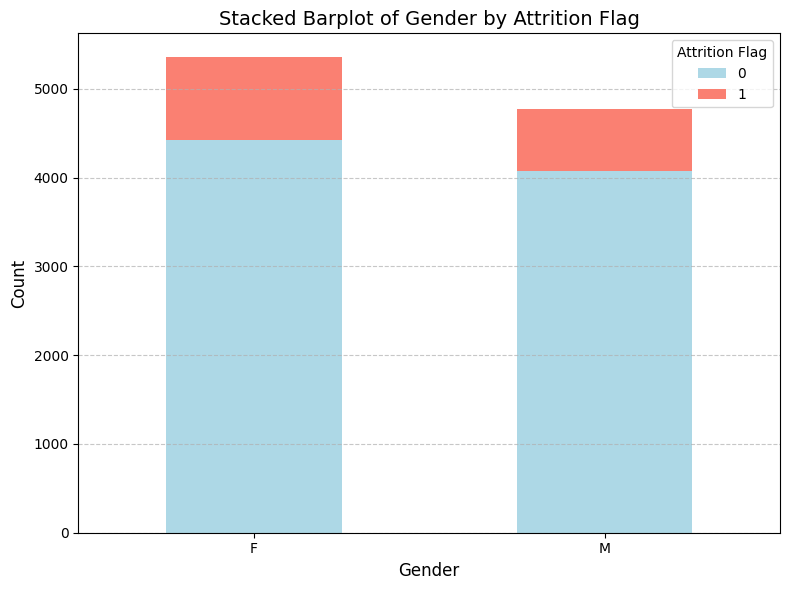

In [41]:
# Create a stacked barplot for "Gender" and "Attrition_Flag"
plt.figure(figsize=(8, 6))
gender_attrition_counts = data.groupby(['Gender', 'Attrition_Flag']).size().unstack()
gender_attrition_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'salmon'])
plt.title('Stacked Barplot of Gender by Attrition Flag', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition Flag', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Observations from the Stacked Barplot of Gender by Attrition Flag:
**Existing Customers**:

- Both genders have a higher proportion of existing customers compared to attrited customers.
- Females (F) slightly outnumber males (M) in the count of existing customers.

**Attrited Customers**:

- The proportion of attrited customers is relatively similar for both genders, with no significant difference in the attrition pattern between males and females.

**Overall Gender Distribution**:

- Females make up a slightly larger share of the overall customer base compared to males.

This plot suggests that gender does not have a significant impact on customer attrition, as the relative proportions of existing and attrited customers are consistent across genders.

####Attrition_Flag vs Marital_Status

<Figure size 800x600 with 0 Axes>

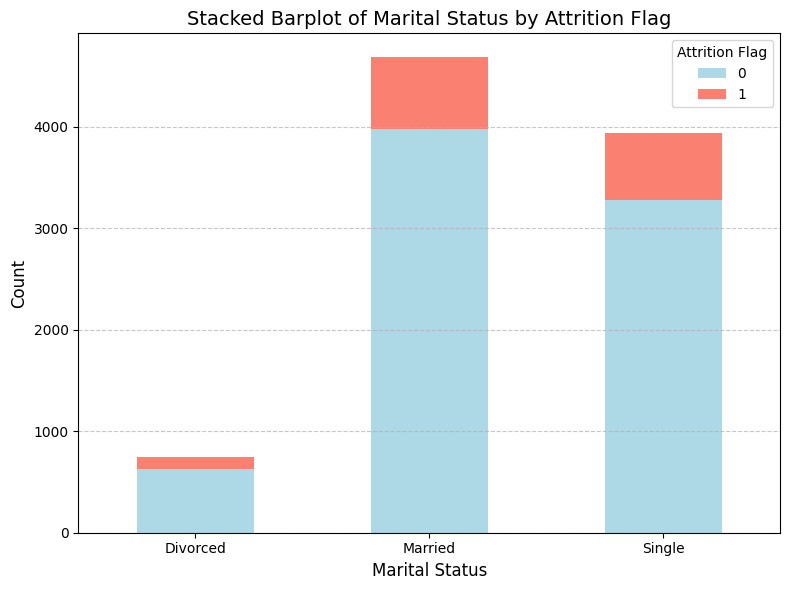

In [42]:
# Create a stacked barplot for "Marital_Status" and "Attrition_Flag"
plt.figure(figsize=(8, 6))
marital_attrition_counts = data.groupby(['Marital_Status', 'Attrition_Flag']).size().unstack()
marital_attrition_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'salmon'])
plt.title('Stacked Barplot of Marital Status by Attrition Flag', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition Flag', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Observations from the Stacked Barplot of Marital Status by Attrition Flag:
**Married Customers**:

- Married customers make up the largest segment of the dataset.
- The majority are existing customers, while a smaller proportion has attrited.

**Single Customers**:

- Single customers represent the second-largest group.
- Similar to married customers, the majority are existing customers, but the proportion of attrited customers appears slightly higher compared to married customers.

**Divorced Customers**:

- Divorced customers make up the smallest group in the dataset.
- There is a relatively small number of both existing and attrited customers in this category, with a lower attrition rate compared to the other groups.

**Comparison**:

- Married customers dominate the customer base, while single customers have a slightly higher proportion of attrited customers.
- Divorced customers show the least attrition but also make up a smaller fraction of the overall dataset.

This analysis suggests marital status could have some correlation with customer attrition, especially among single customers.

####Attrition_Flag vs Education_Level

<Figure size 1000x600 with 0 Axes>

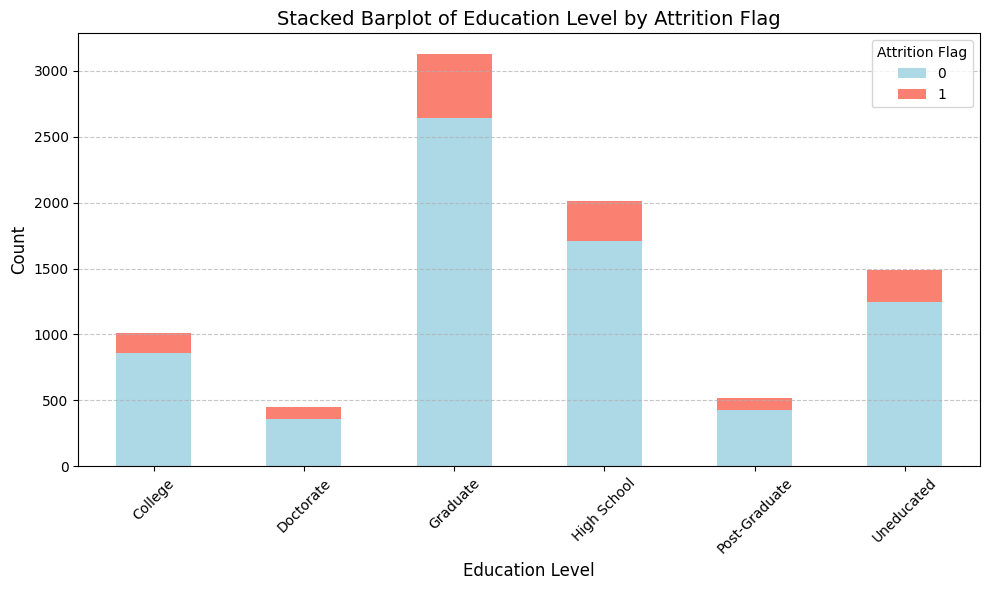

In [43]:
# Create a stacked barplot for "Education_Level" and "Attrition_Flag"
plt.figure(figsize=(10, 6))
education_attrition_counts = data.groupby(['Education_Level', 'Attrition_Flag']).size().unstack()
education_attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Stacked Barplot of Education Level by Attrition Flag', fontsize=14)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition Flag', loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Observations from the Stacked Barplot of Education Level by Attrition Flag:
**Graduates**:

- Graduates form the largest segment of the customer base.
- The majority of graduate customers are existing customers, with a relatively small proportion attrited.

**High School and Uneducated**:

- High school graduates and uneducated customers make up the next largest groups.
- Both categories show a higher proportion of attrited customers compared to graduates.

**College, Post-Graduate, and Doctorate**:

- These groups represent smaller portions of the customer base.
- College and postgraduate customers have more attrited customers compared to doctoral degree holders, but all groups are primarily composed of existing customers.

**Comparison**:

- Higher levels of education (e.g., doctorate and graduate) tend to have a lower proportion of attrited customers, whereas lower education levels (e.g., high school and uneducated) show relatively higher attrition.

This analysis suggests that education level could influence customer attrition, with higher education levels associated with better customer retention.

####Attrition_Flag vs Income_Category

<Figure size 1000x600 with 0 Axes>

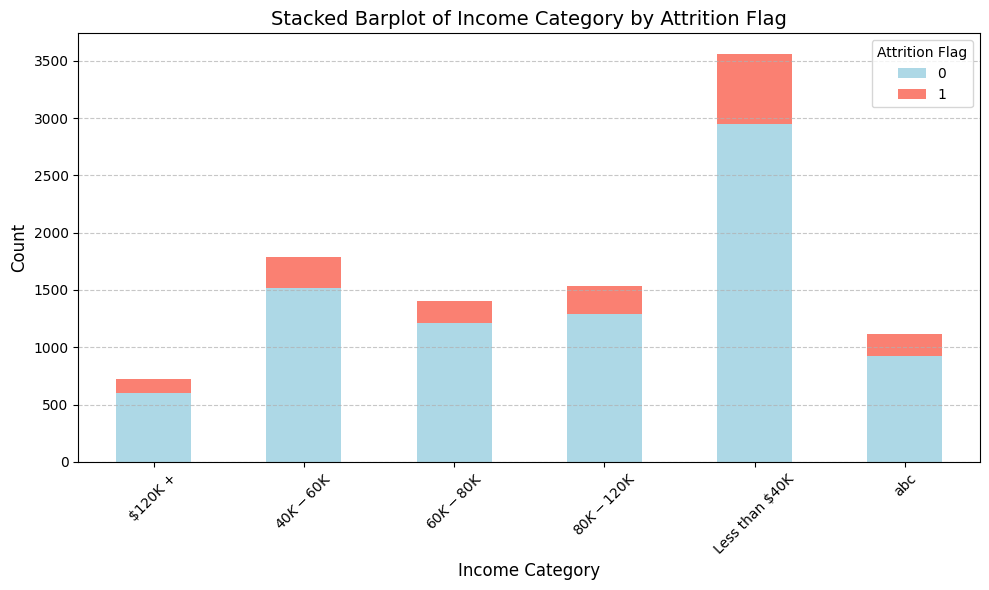

In [44]:
# Create a stacked barplot for "Income_Category" and "Attrition_Flag"
plt.figure(figsize=(10, 6))
income_attrition_counts = data.groupby(['Income_Category', 'Attrition_Flag']).size().unstack()
income_attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Stacked Barplot of Income Category by Attrition Flag', fontsize=14)
plt.xlabel('Income Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition Flag', loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Observations from the Stacked Barplot of Income Category by Attrition Flag:
**Less than $40K**:

- This is the largest income category in the dataset.
- A significant number of customers fall under this category, with most being existing customers, though a noticeable portion has attrited.

**$40K - $60K, $60K - $80K, $80K - $120K**:

- These mid-level income categories have similar distributions.
- Most customers are existing, with a smaller but consistent proportion of attrited customers.

**$120K+**:

- This is the smallest group in terms of customer count.
- The proportion of attrited customers is relatively low compared to other categories, indicating better retention among high-income customers.

**Ambiguous Category ("abc")**:

- This category has a notable number of customers, though the label might suggest a data quality issue.
- Both existing and attrited customers are present in this group, but it should be reviewed for data integrity.

**Comparison**:

- Lower-income categories (e.g., Less than $40K) have a higher proportion of attrited customers compared to higher-income categories (e.g., $120K+), suggesting that income level might be correlated with retention.

This analysis suggests that income level could play a role in customer attrition, with higher-income customers exhibiting better retention rates.

####Attrition_Flag vs Contacts_Count_12_mon

<Figure size 1000x600 with 0 Axes>

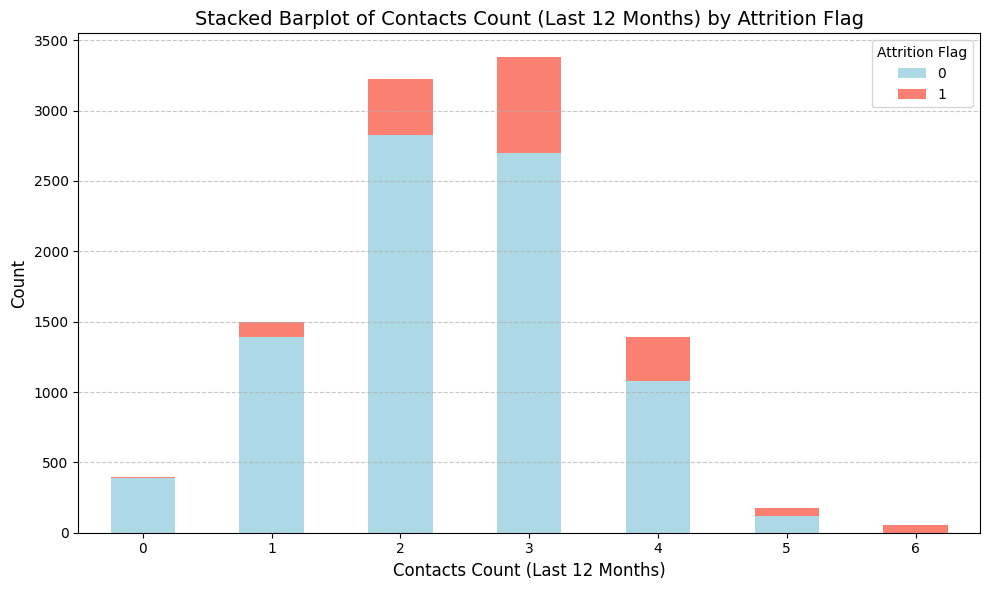

In [45]:
# Create a stacked barplot for "Contacts_Count_12_mon" and "Attrition_Flag"
plt.figure(figsize=(10, 6))
contacts_attrition_counts = data.groupby(['Contacts_Count_12_mon', 'Attrition_Flag']).size().unstack()
contacts_attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Stacked Barplot of Contacts Count (Last 12 Months) by Attrition Flag', fontsize=14)
plt.xlabel('Contacts Count (Last 12 Months)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition Flag', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Observations from the Stacked Barplot of Contacts Count (Last 12 Months) by **Attrition Flag**:
- Contact Frequency of 2 or 3:

- The majority of customers contacted the bank 2 or 3 times in the last 12 months.
- Most of these customers are existing customers, but there is a noticeable proportion of attrited customers.

**Higher Contact Frequency (4 to 6)**:

- A smaller number of customers contacted the bank 4 to 6 times.
- Attrited customers make up a smaller proportion in these higher contact frequency groups.

**Lower Contact Frequency (0 to 1)**:

- Customers with 0 or 1 contact in the last 12 months show a relatively higher proportion of attrited customers compared to other contact frequencies.
This suggests that low interaction with the bank may be linked to higher attrition rates.

**Comparison**:

- Attrited customers are more prevalent among those with low contact frequency (0–1) and less common among customers with higher contact frequency (4–6).

This analysis highlights that customer engagement, as measured by contact frequency, may play a significant role in attrition. Customers with minimal interaction with the bank are more likely to attrite, suggesting a need for proactive engagement strategies. L

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

####Attrition_Flag vs Months_Inactive_12_mon

<Figure size 1000x600 with 0 Axes>

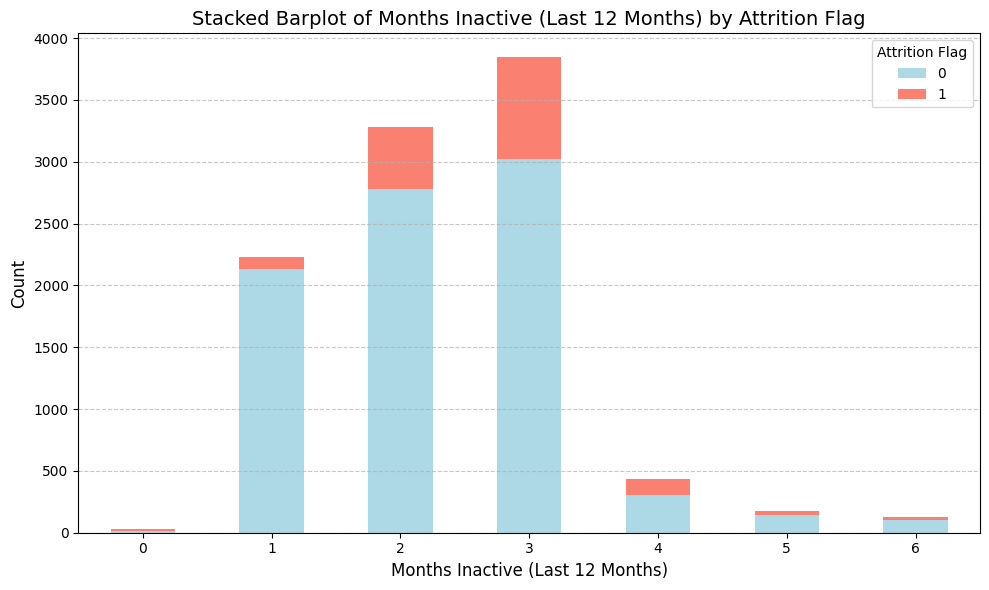

In [46]:
# Create a stacked barplot for "Months_Inactive_12_mon" and "Attrition_Flag"
plt.figure(figsize=(10, 6))
inactive_months_attrition_counts = data.groupby(['Months_Inactive_12_mon', 'Attrition_Flag']).size().unstack()
inactive_months_attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Stacked Barplot of Months Inactive (Last 12 Months) by Attrition Flag', fontsize=14)
plt.xlabel('Months Inactive (Last 12 Months)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition Flag', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Observations from the Stacked Barplot of Months Inactive (Last 12 Months) by **Attrition Flag**:
**Inactive for 2 or 3 Months**:

- The majority of customers fall into this range, with most being existing customers.
- However, the proportion of attrited customers is notably higher for those with 3 months of inactivity compared to 2 months.

**Higher Inactivity (4 to 6 Months)**:

C-ustomers with 4 to 6 months of inactivity show a much higher proportion of attrited customers, indicating a strong correlation between prolonged inactivity and attrition.

**Lower Inactivity (0 to 1 Month)**:

- Customers with 0 or 1 month of inactivity are predominantly existing customers, suggesting that low inactivity is linked to retention.

**Comparison**:

- Attrition rates increase significantly with the number of inactive months.
- Customers with more than 3 months of inactivity are at a higher risk of attrition, making inactivity a strong predictor of customer behavior.

This analysis highlights that prolonged inactivity is a key indicator of customer attrition. Banks may benefit from proactive re-engagement strategies for customers with increasing inactivity.

####Attrition_Flag vs Total_Relationship_Count

<Figure size 1000x600 with 0 Axes>

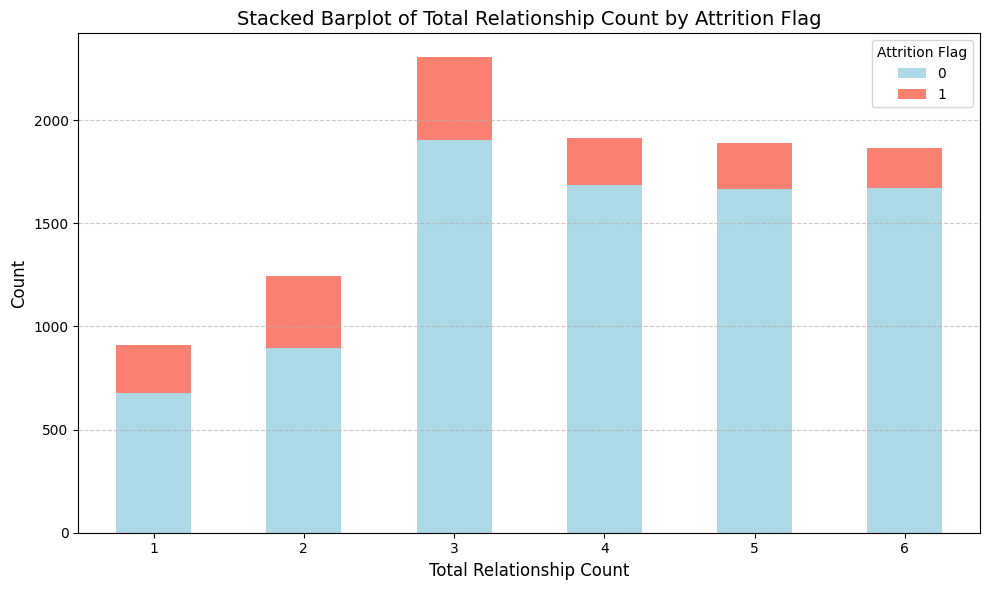

In [47]:
# Create a stacked barplot for "Total_Relationship_Count" and "Attrition_Flag"
plt.figure(figsize=(10, 6))
relationship_attrition_counts = data.groupby(['Total_Relationship_Count', 'Attrition_Flag']).size().unstack()
relationship_attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Stacked Barplot of Total Relationship Count by Attrition Flag', fontsize=14)
plt.xlabel('Total Relationship Count', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition Flag', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Observations from the Stacked Barplot of Total Relationship Count by **Attrition Flag**:
**Low Relationship Count (1-2)**:

- Customers with fewer relationships (1 or 2) have a noticeably higher proportion of attrited customers compared to those with more relationships.
- Attrition rates are particularly prominent for customers with only 1 relationship.

**Moderate Relationship Count (3-4)**:

- The majority of customers in this group are existing customers.
-Attrition rates are lower compared to those with fewer relationships.

**High Relationship Count (5-6)**:

- Customers with 5 or 6 relationships have the lowest attrition rates.
- Almost all customers in this group are existing customers, indicating that higher engagement through multiple relationships is strongly correlated with retention.

**Comparison**:

- Attrition decreases significantly as the total relationship count increases.
Customers with higher engagement levels (measured by the number of relationships) are more likely to remain active.

This analysis highlights that increasing the number of relationships with customers could improve retention.

####Attrition_Flag vs Dependent_count

<Figure size 1000x600 with 0 Axes>

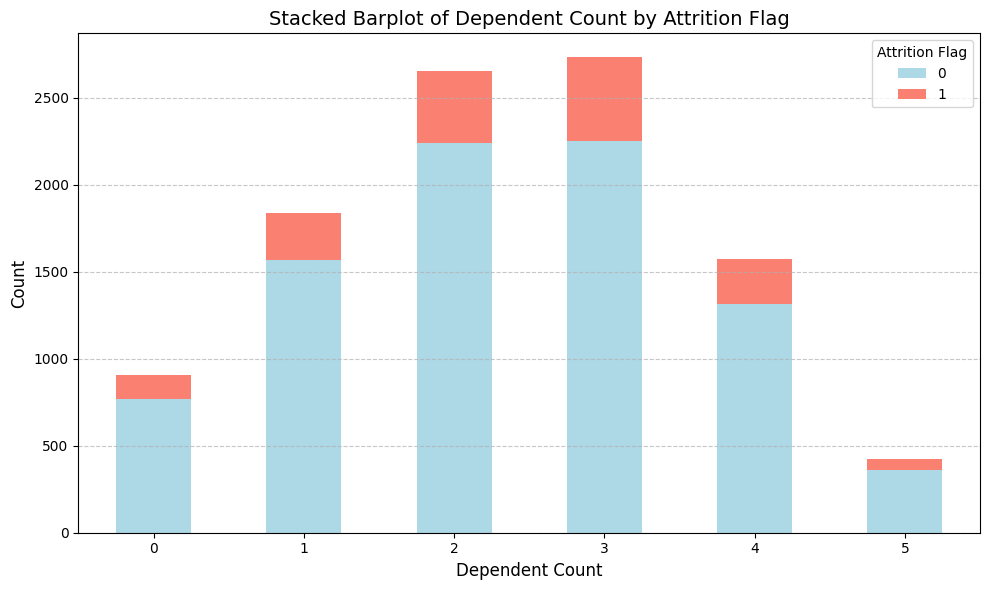

In [48]:
# Create a stacked barplot for "Dependent_count" and "Attrition_Flag"
plt.figure(figsize=(10, 6))
dependent_attrition_counts = data.groupby(['Dependent_count', 'Attrition_Flag']).size().unstack()
dependent_attrition_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'salmon'])
plt.title('Stacked Barplot of Dependent Count by Attrition Flag', fontsize=14)
plt.xlabel('Dependent Count', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition Flag', loc='upper right')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

###Observations from the Stacked Barplot of Dependent Count by Attrition Flag:
**Dependent Count of 2 or 3**:

- These are the most common dependent counts in the dataset.
- The majority of customers in these categories are existing customers, with a relatively smaller proportion of attrited customers.

**Dependent Count of 0**:

- Customers with no dependents have a noticeably higher proportion of attrited customers compared to those with dependents.

**Dependent Count of 1, 4, or 5**:

- These categories show moderate proportions of attrited customers but are predominantly composed of existing customers.

**Comparison**:

- Customers with no dependents (Dependent Count = 0) are at a higher risk of attrition compared to customers with dependents.
- Having a dependent count of 2 or 3 correlates with higher retention rates, suggesting that customers with small families may have stronger relationships with the bank.

This analysis indicates that dependent count might influence attrition patterns, with single customers (no dependents) being more likely to attrite.

####Total_Revolving_Bal` vs `Attrition_Flag

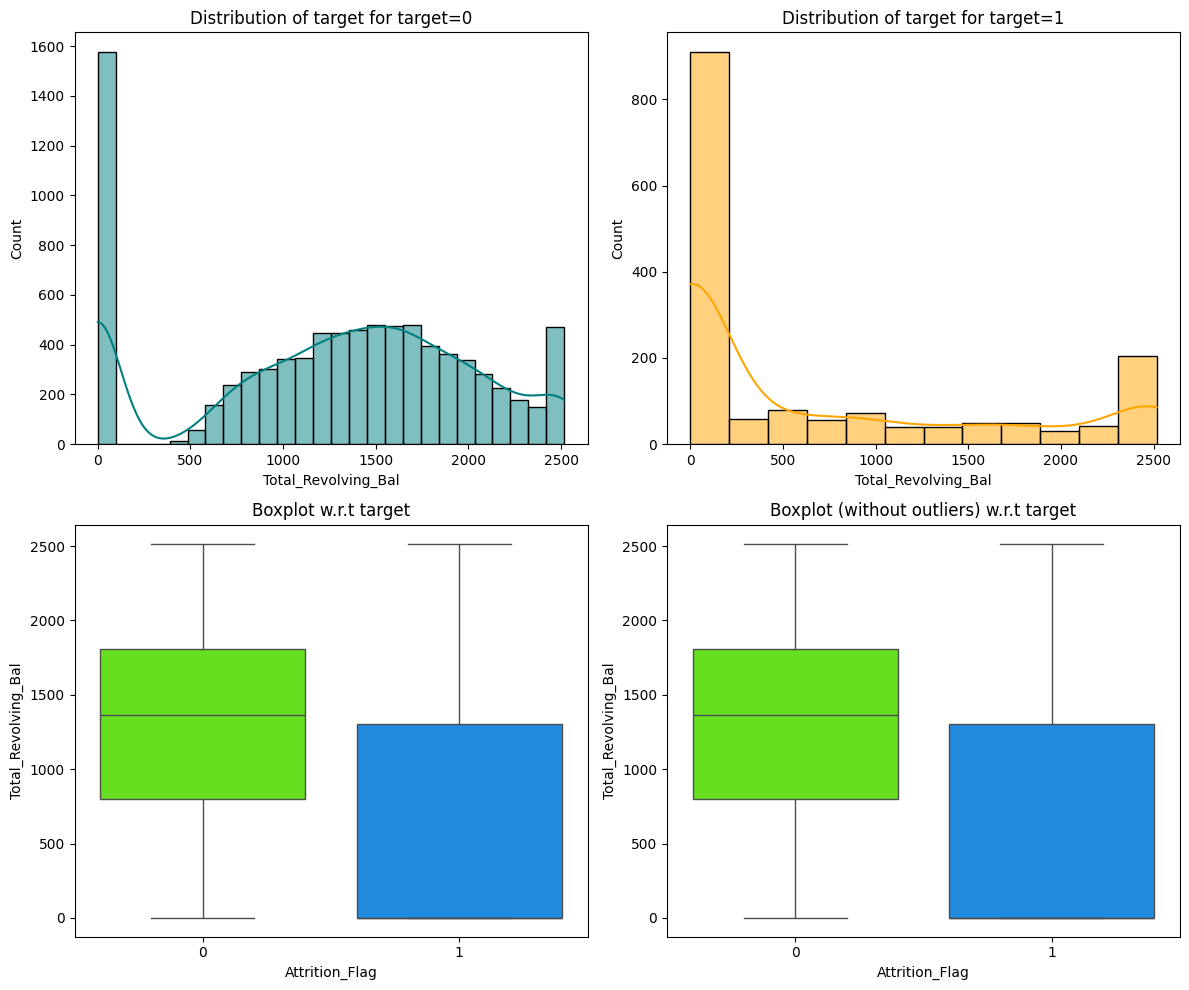

In [49]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

###Observations for Total Revolving Balance by Attrition Flag:
**Existing Customers**:

- A significant proportion of existing customers have a total revolving balance close to 0, indicating that many pay off their balances regularly.
- Beyond 0, the distribution shows a broad peak around 1,000 to 1,500.

**Attrited Customers**:

- Attrited customers show a similar pattern, but with fewer individuals at higher balances.
- The density for attrited customers is lower overall, indicating they are a smaller segment of the dataset.

**Comparison**:

Both groups follow a similar trend, but existing customers dominate at higher revolving balance values, suggesting better retention for customers with larger balances.

This analysis indicates that total revolving balance may not be a strong differentiator between existing and attrited customers but does highlight the preference for retention among customers with higher balances.

####Attrition_Flag vs Credit_Limit

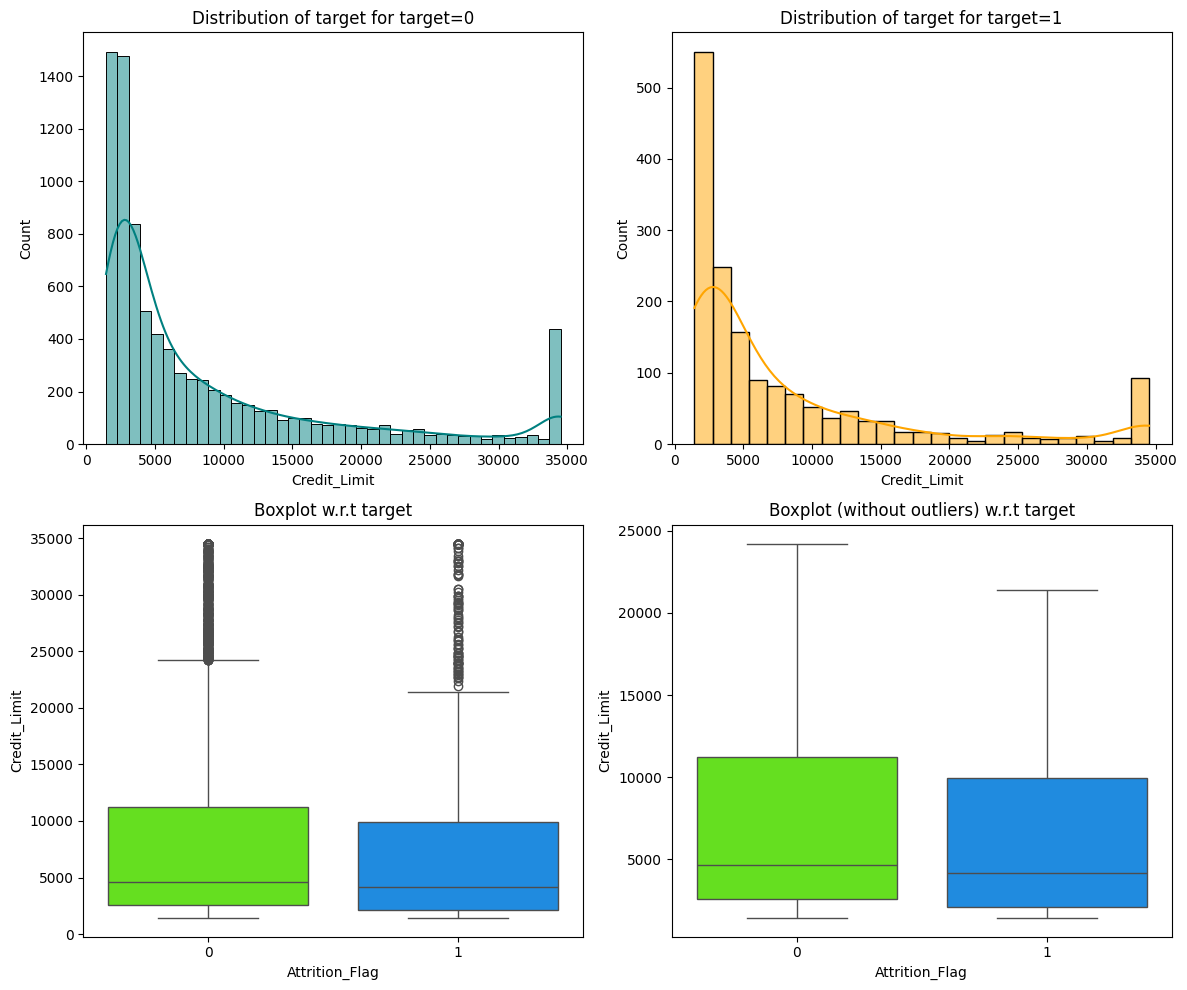

In [50]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

###Observations for Credit Limit by Attrition Flag:
**Existing Customers**:

- The majority of existing customers have credit limits concentrated around $5,000 to $10,000.
- There is a noticeable long tail in the distribution, with some customers having credit limits as high as $35,000.

**Attrited Customers**:

- Attrited customers have a similar concentration around lower credit limits ($5,000 and below).

- However, the density for attrited customers declines more sharply for credit limits exceeding $10,000, suggesting fewer attrited customers in higher credit limit ranges.

**Comparison**:

- Existing customers dominate in higher credit limit ranges, suggesting better retention among customers with greater purchasing power or financial flexibility.
- Attrited customers are more concentrated in the lower credit limit ranges.

This analysis indicates that higher credit limits may be associated with improved customer retention.

####Attrition_Flag vs Customer_Age

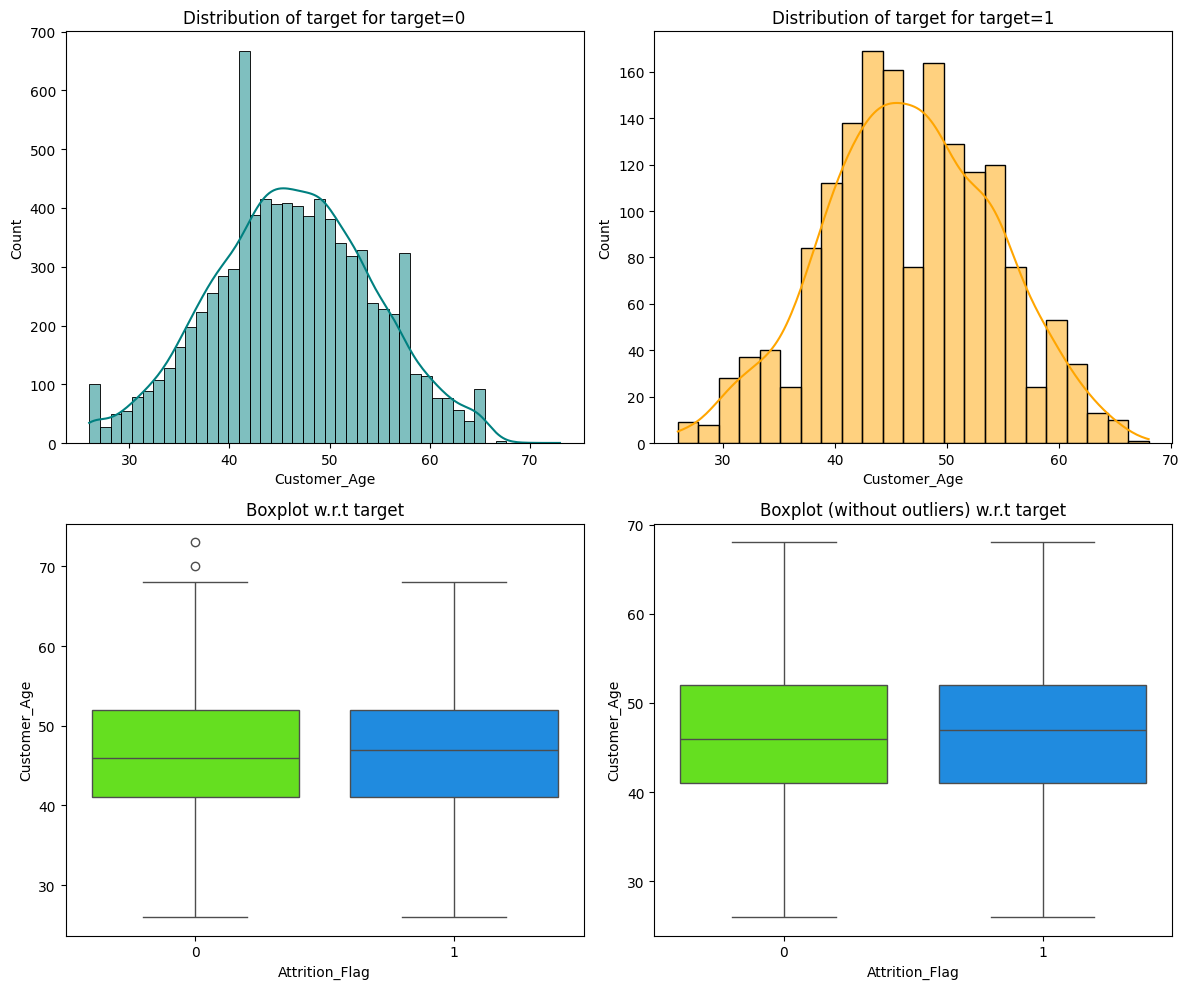

In [51]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

###Observations for Customer Age by Attrition Flag:
**Existing Customers**:

- The age distribution for existing customers follows a normal distribution, peaking around 45 to 50 years old.
- The majority of existing customers are concentrated between 35 and 60 years old.

**Attrited Customers**:

- Attrited customers also follow a similar pattern but with a slightly lower density overall.
- The peak for attrited customers is slightly broader, indicating a wider spread of ages compared to existing customers.

**Comparison**:

- Attrited customers are present across all age groups, but their density is consistently lower than that of existing customers.
- There is no strong indication that age significantly affects attrition, as the distributions for both groups largely overlap.

This analysis suggests that while there is no significant difference in the age distribution between the two groups, younger and middle-aged customers are more prevalent overall.

####Total_Trans_Ct` vs `Attrition_Flag

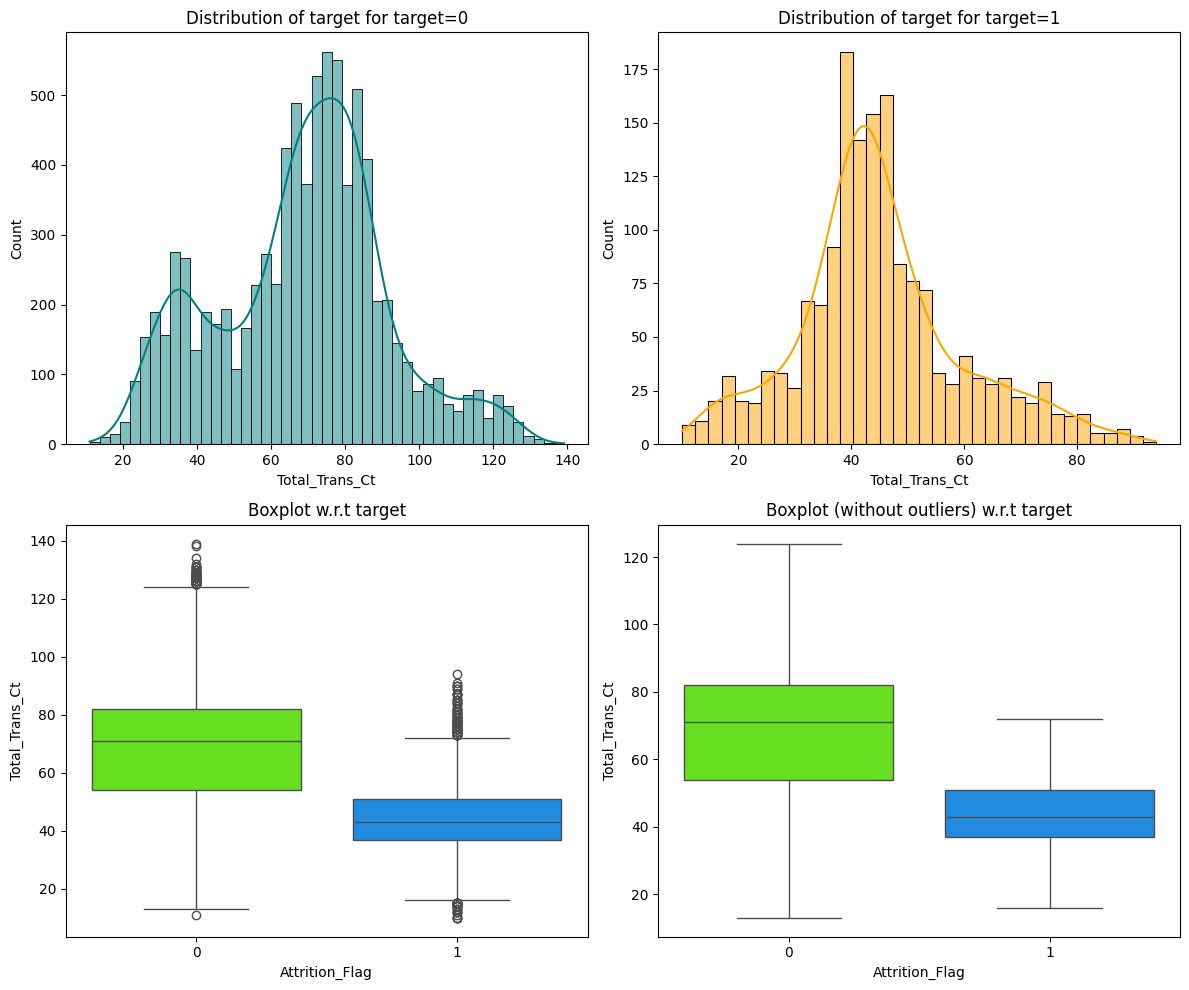

In [52]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

###Observations for Total Transaction Count by Attrition Flag:
**Existing Customers**:

- The distribution for existing customers is broader and peaks around 60 to 70 transactions.
- Most existing customers have higher transaction counts compared to attrited customers.

**Attrited Customers**:

- Attrited customers have a narrower distribution, with a peak around 40 transactions.
- The density drops significantly for transaction counts beyond 60, indicating fewer attrited customers with high transaction activity.

**Comparison**:

- Existing customers exhibit higher transaction activity overall.
- Attrition is more common among customers with lower transaction counts (around 40 or fewer), suggesting that transaction frequency could be a strong predictor of customer engagement and retention.

This analysis highlights that customers with higher transaction counts are more likely to remain active, while lower transaction counts correlate with attrition.

####Total_Trans_Amt` vs `Attrition_Flag

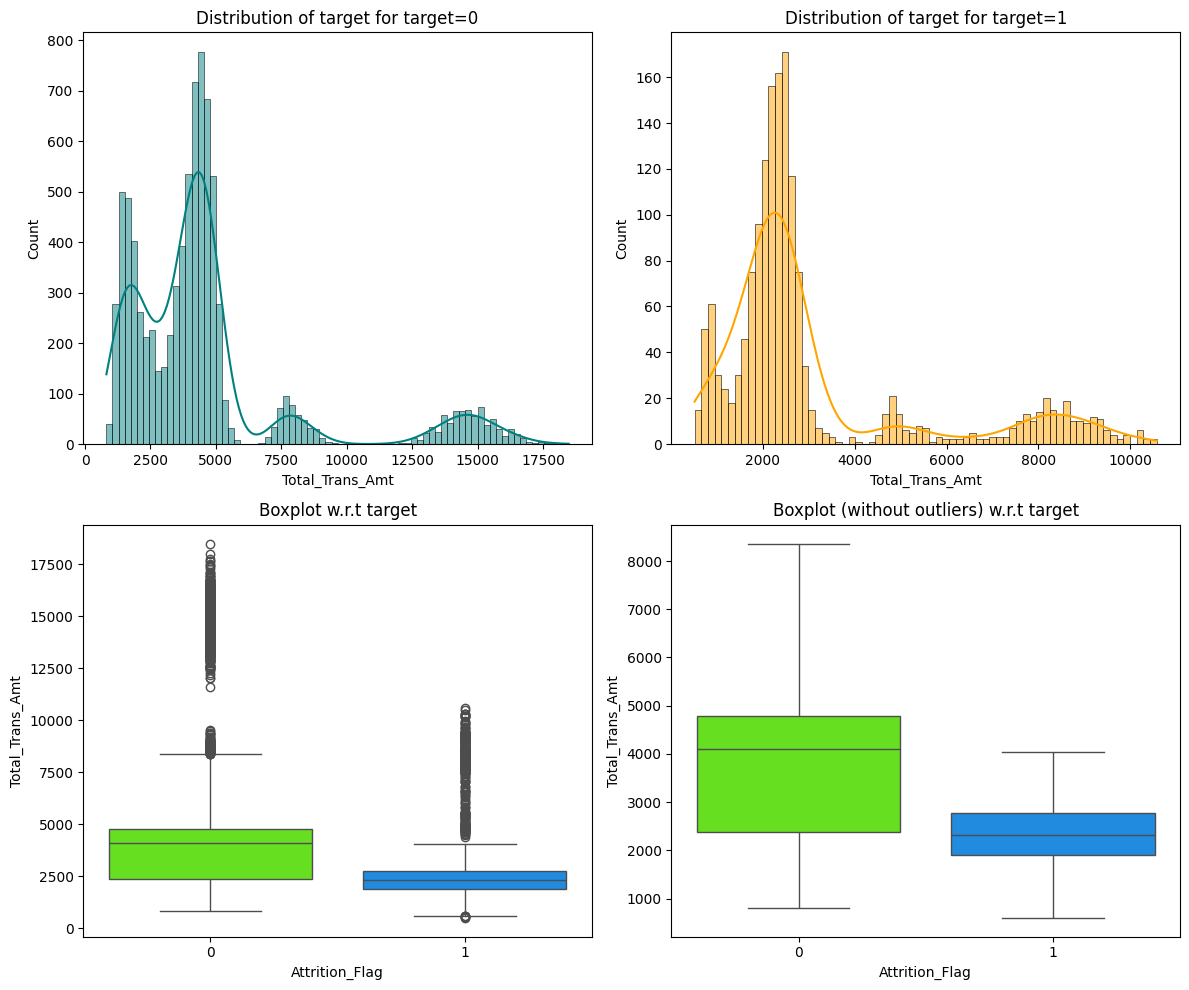

In [53]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

###Observations for Total Transaction Amount by Attrition Flag:
**Existing Customers**:

- Existing customers show a bimodal distribution, with peaks around $2,500 and $5,000.

- A smaller secondary peak occurs between $12,000 and $15,000, indicating higher transaction volumes for some customers.

**Attrited Customers**:

- Attrited customers primarily concentrate around $2,500.

- The density drops significantly beyond $5,000, with very few attrited customers having high transaction amounts.

**Comparison**:

- Existing customers are more evenly distributed across higher transaction amounts, while attrited customers are concentrated at lower transaction amounts.
- The presence of higher transaction amounts correlates strongly with customer retention.

This analysis suggests that higher transaction amounts are associated with existing customers, while lower transaction amounts might indicate a risk of attrition

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

####Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag

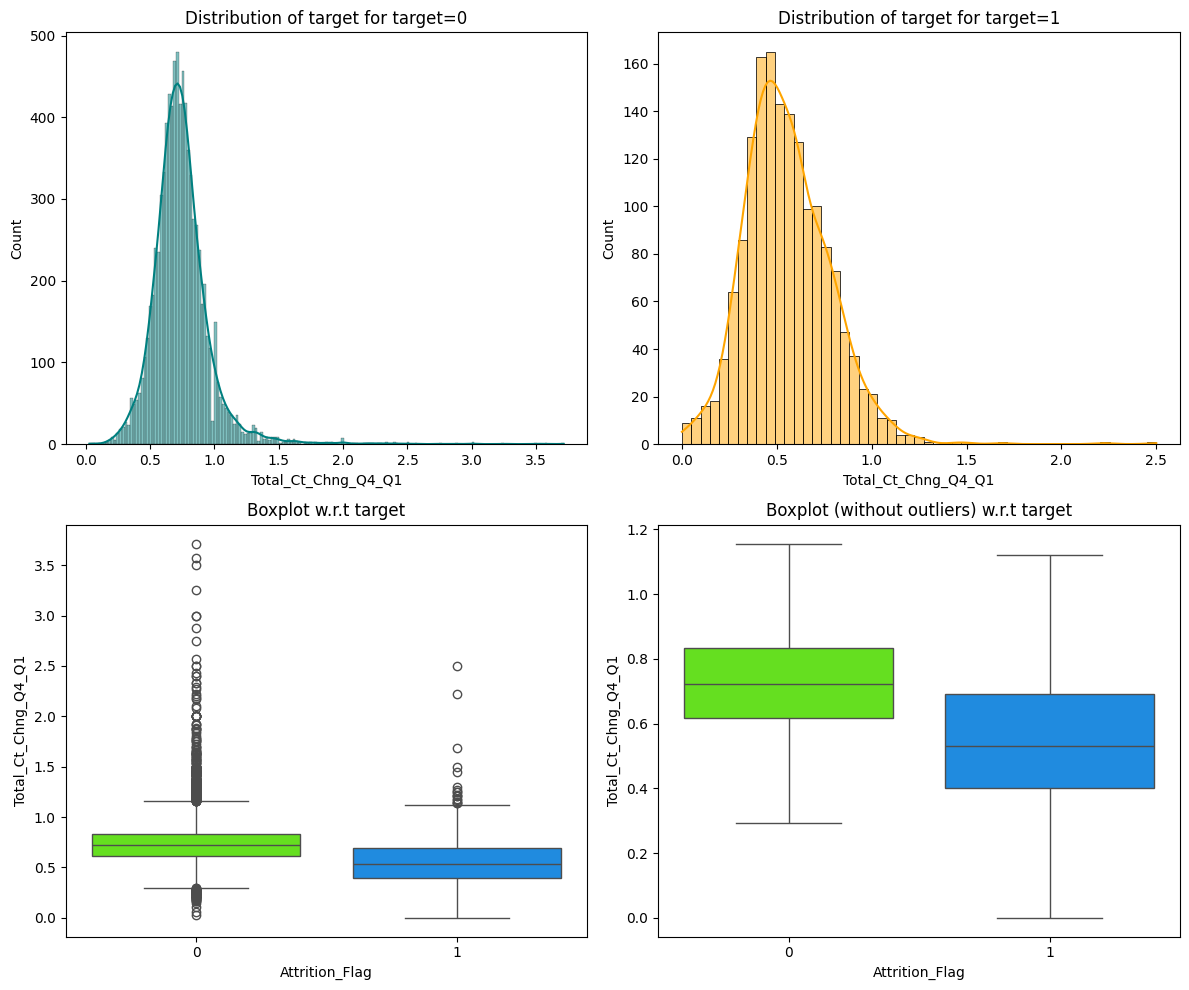

In [54]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

###Observations for Total Transaction Count Change (Q4 vs Q1) by Attrition Flag:
**Existing Customers**:

- The distribution for existing customers peaks around 0.7 to 0.8, indicating a higher average change in transaction count compared to attrited customers.

- The density declines sharply beyond 1.5, but some existing customers exhibit very high transaction count changes, reflecting more engagement.

**Attrited Customers**:

- The peak for attrited customers is lower, around 0.5, suggesting smaller changes in transaction counts.

- The density for attrited customers drops significantly after 1.0, with very few exhibiting high transaction count changes.

**Comparison**:

- Existing customers generally exhibit higher changes in transaction counts compared to attrited customers.

- A strong overlap exists for lower transaction count changes (below 0.6), but the divergence becomes apparent as the values increase.

This analysis indicates that a higher change in transaction counts between Q4 and Q1 correlates with customer retention, while smaller changes might signal a higher likelihood of attrition

#####Avg_Utilization_Ratio` vs `Attrition_Flag

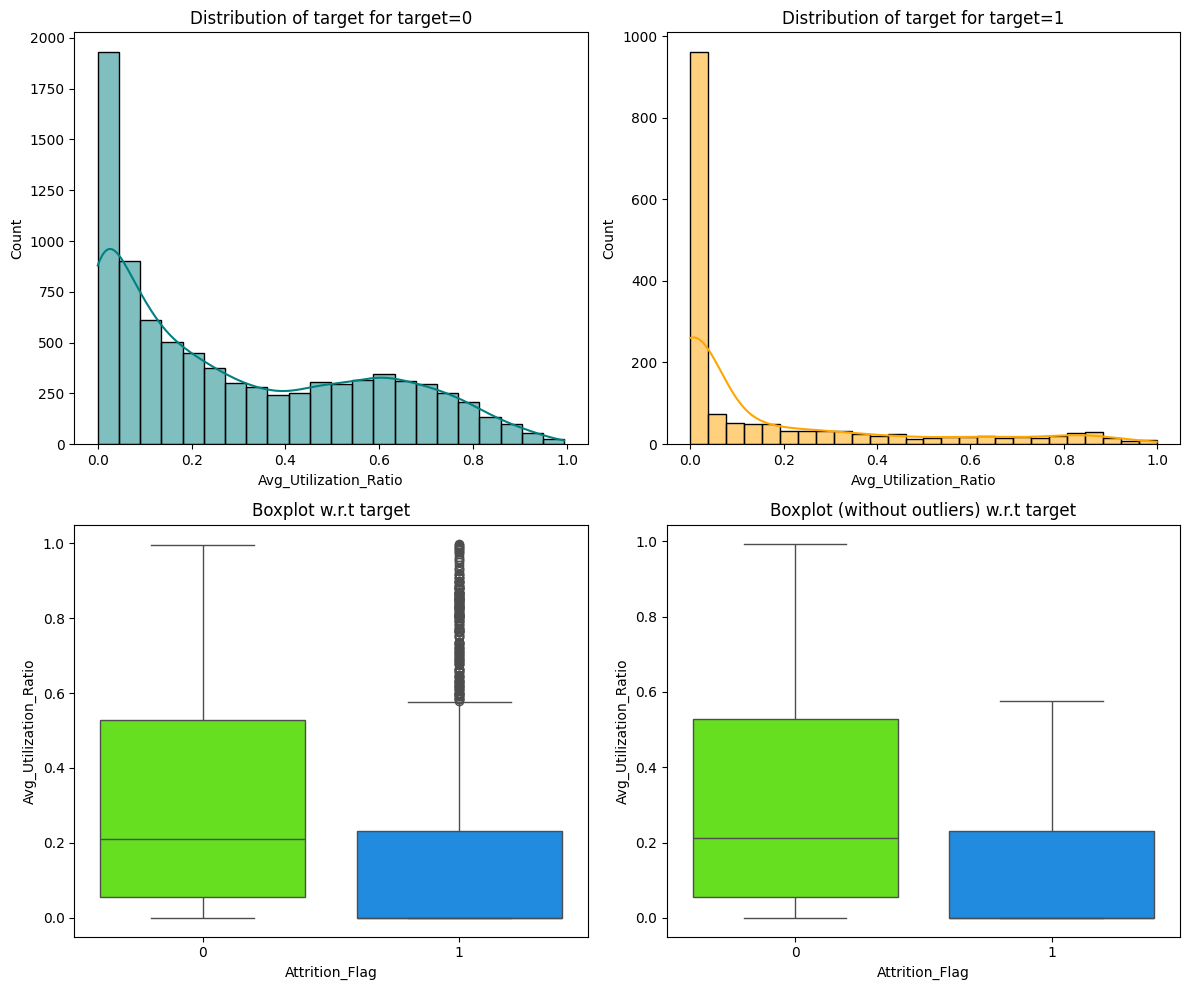

In [55]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

###Observations for Average Utilization Ratio by Attrition Flag:
**Existing Customers**:

- The majority of existing customers have low average utilization ratios, with a significant peak near 0.0 to 0.1.
- The density decreases gradually as utilization increases, with a few existing customers having utilization ratios closer to 1.0.

**Attrited Customers**:

- Attrited customers also exhibit a peak near 0.0, but their density is much lower overall compared to existing customers.
- Attrited customers have a more pronounced drop-off at higher utilization ratios, with very few having ratios above 0.5.

**Comparison**:

- Both groups are concentrated at lower utilization ratios, but existing customers dominate at nearly all levels of utilization.
- Attrited customers tend to have slightly lower utilization overall, suggesting less engagement or financial activity before leaving.

This analysis indicates that while both groups share similar patterns, higher engagement (as reflected by utilization ratio) is more common among retained customers.

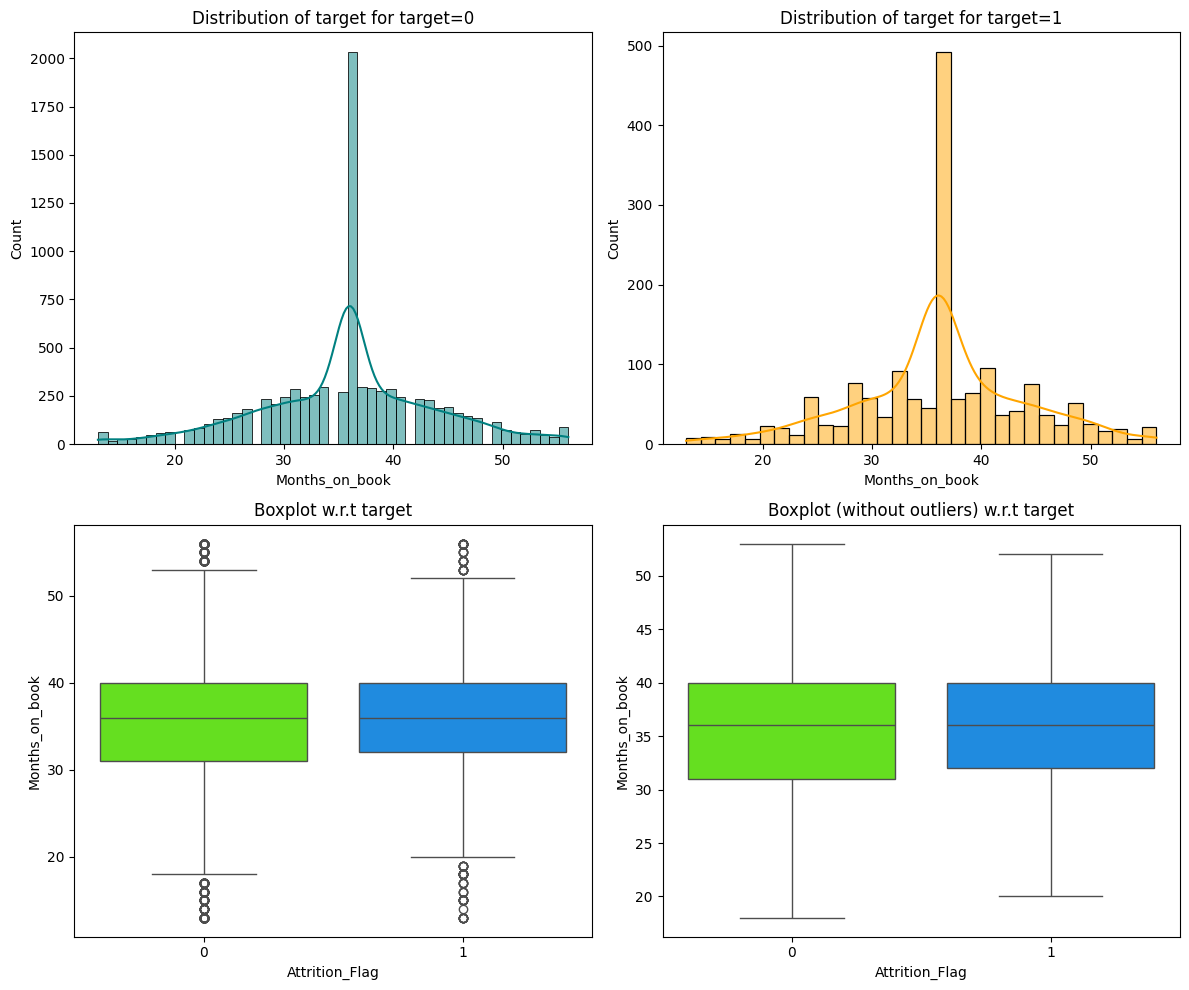

In [56]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

###Observations for Months on Book by Attrition Flag:
**Existing Customers**:

- The distribution for existing customers peaks sharply around 36 months, suggesting this is the most common tenure.
- The majority of existing customers have been with the bank for 30 to 40 months, with a small but consistent tail extending to longer tenures.

**Attrited Customers**:

- Attrited customers also show a peak around 36 months, but their density is much lower overall compared to existing customers.
The distribution is broader, with a notable proportion of attrited customers having shorter tenures (below 30 months).

**Comparison**:

- Both groups share a similar peak at 36 months, but attrited customers are more evenly spread across shorter tenures, indicating higher attrition among newer customers.

This analysis highlights that customer retention is stronger for those with moderate to long tenures, while shorter tenures may signal a higher likelihood of attrition.

####Attrition_Flag vs Total_Revolving_Bal

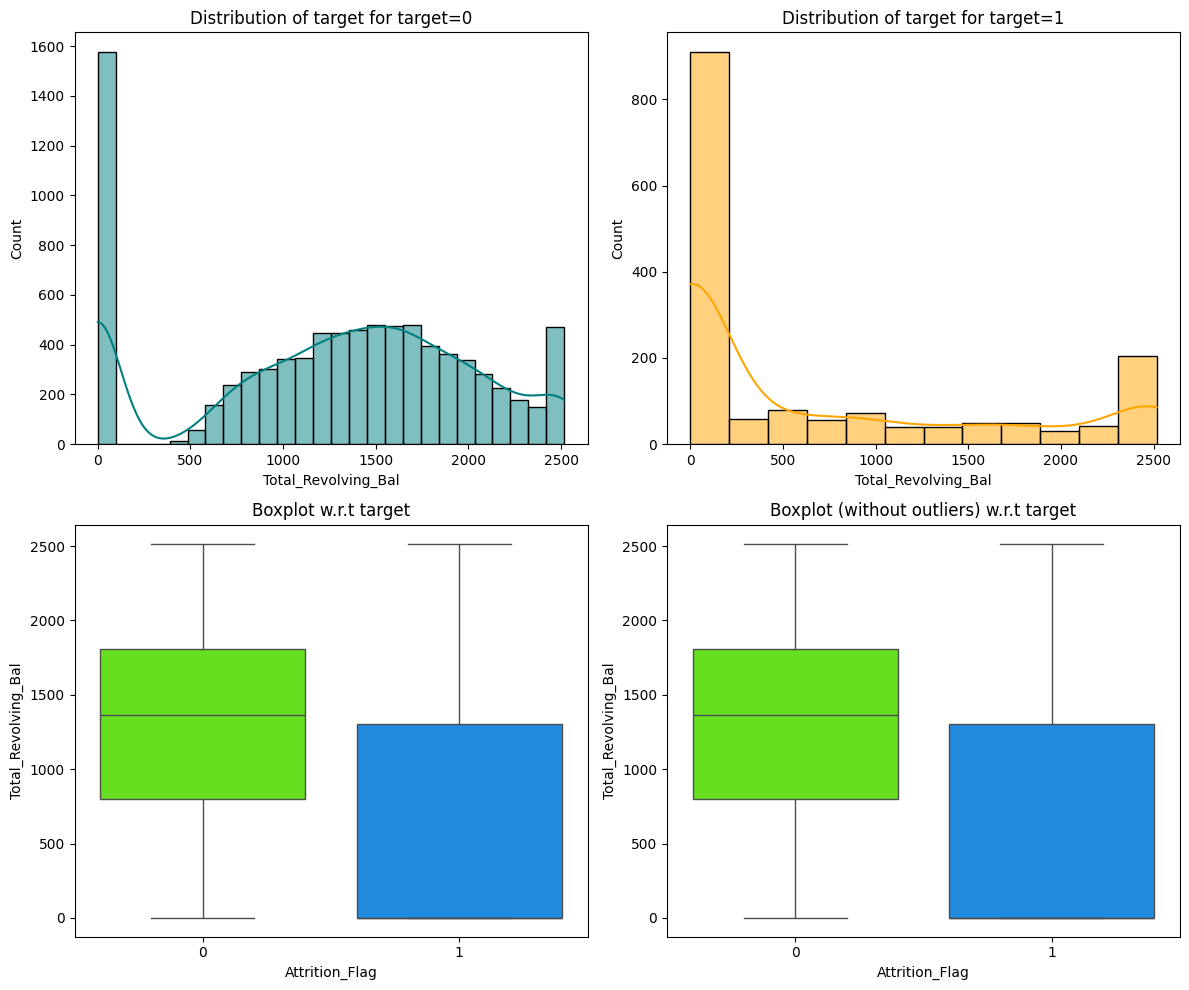

In [57]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

###Observations for Total Revolving Balance by Attrition Flag:
**Existing Customers**:

- The majority of existing customers have revolving balances clustered around 0, indicating they likely pay off their balances regularly.
- Beyond 0, there is a broad distribution peaking between 1,000 and 2,000.

**Attrited Customers**:

- Attrited customers also show a significant density at 0, but their presence declines sharply beyond that point.
- Attrited customers are less frequent at higher revolving balances compared to existing customers.

**Comparison**:

- Existing customers dominate across the range, especially at higher revolving balances.
- Attrited customers are more concentrated at lower revolving balances, with fewer customers in the moderate-to-high balance range.

These insights suggest that higher revolving balances are more common among retained customers, while attrition is more frequent among those with lower balances.

####Attrition_Flag vs Avg_Open_To_Buy

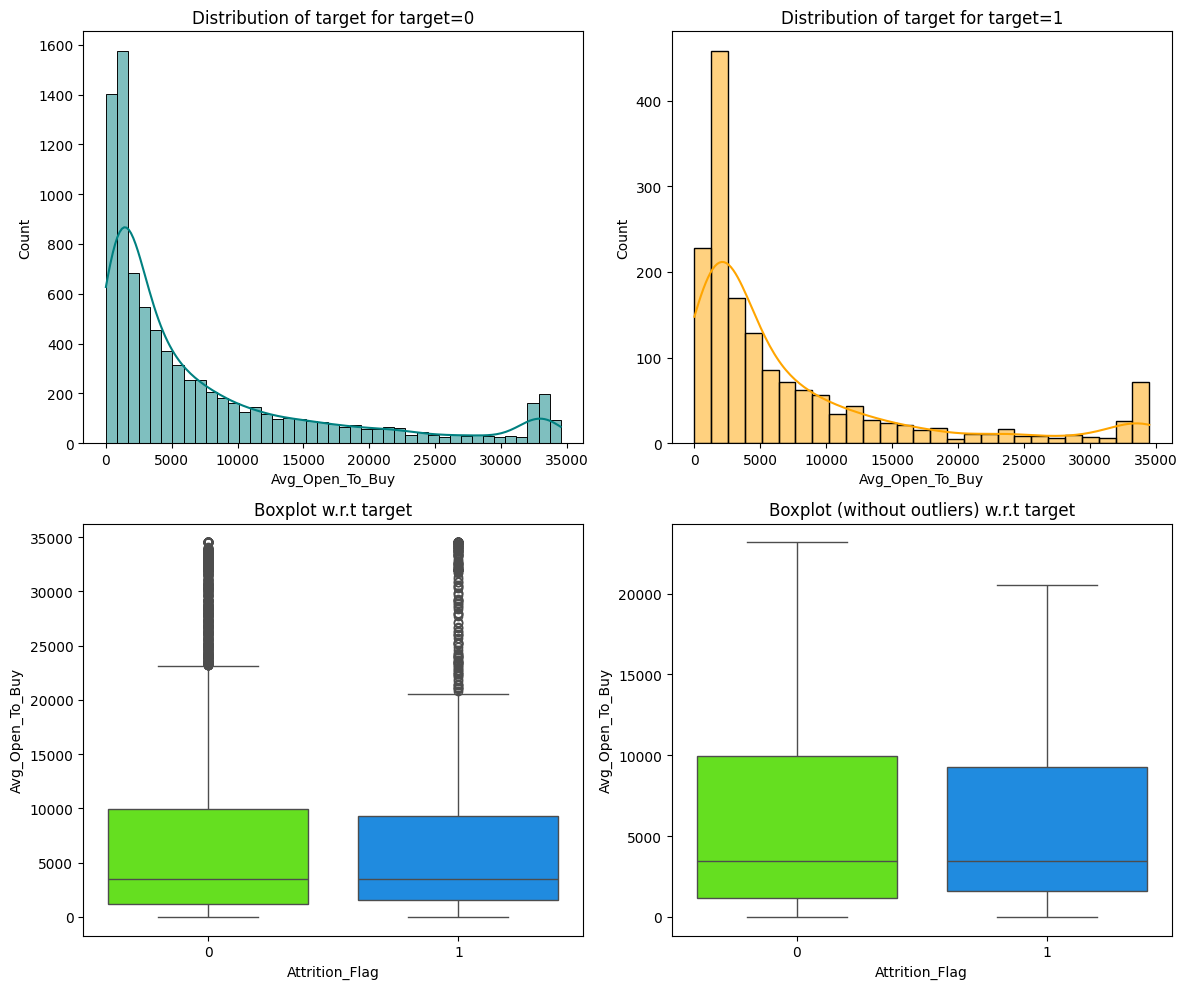

In [58]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

###Observations for Average Open to Buy by Attrition Flag:
Existing Customers:

The majority of existing customers have average open-to-buy limits clustered between $5,000 and $10,000.
The distribution exhibits a long tail, with some existing customers having open-to-buy limits exceeding $30,000.
Attrited Customers:

Attrited customers have a similar concentration at lower open-to-buy limits, primarily below $5,000.
The density for attrited customers decreases sharply beyond $10,000, with very few customers having high open-to-buy limits.
Comparison:

Existing customers dominate across all ranges, especially at higher open-to-buy limits.
Attrited customers are more concentrated in the lower ranges, indicating that higher open-to-buy limits may be associated with better retention.
This analysis suggests that higher open-to-buy credit limits may correlate with customer retention, while lower limits are more common among attrited customers

###6. What are the attributes that have a strong correlation with each other?

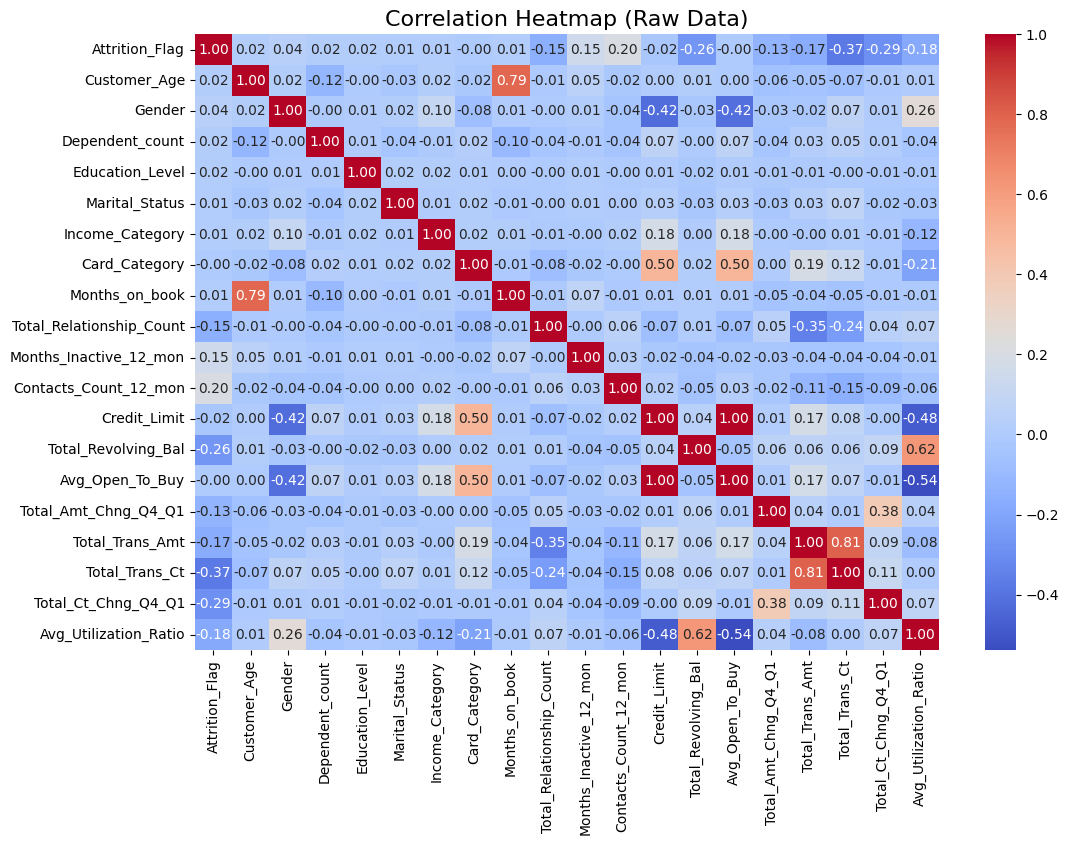

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Temporarily encode categorical variables for correlation heatmap
data_encoded = data.copy()
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    data_encoded[col], _ = pd.factorize(data[col])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Raw Data)', fontsize=16)
plt.show()

###Observations from the Correlation Matrix:
**Strong Positive Correlations:**

- **Months_on_book and Customer_Age**: A correlation of 0.79 suggests that older customers tend to have been with the bank for a longer duration.

- **Total_Trans_Amt and Total_Trans_Ct**: A very strong correlation of 0.81 indicates that the number of transactions is directly related to the transaction amount.
- **Credit_Limit and Avg_Open_To_Buy**:A very strong correlation of 1.0 indicates that the average open to buy is directly related to the credit limit.

**Moderate Positive Correlations:**

- **Total_Revolving_Bal and Avg_Utilization_Ratio**: A correlation of 0.62 suggests that higher revolving balances are associated with higher utilization ratios.

- **Card_Category and Avg_Open_To_Buy**: A correlation of 0.50 shows that customers with higher credit limits tend to have more available credit.

**Weak or Negligible Correlations**:

- Most other features show weak correlations with each other, suggesting they are relatively independent.

- Months_Inactive_12_mon has very little correlation with most other features, implying that customer inactivity is relatively isolated from other behaviors.

**Negative Correlations**:

- **Avg_Utilization_Ratio and Avg_Open_To_Buy**: A negative correlation of -0.54 indicates that as customers use more of their available credit, their remaining open-to-buy credit decreases.

**Insights for Model Building**:

Features like Total_Trans_Amt, Total_Trans_Ct, Credit_Limit, and Avg_Utilization_Ratio may be important for understanding customer behavior due to their stronger correlations with each other or the target.
Weakly correlated features may still add value depending on the context but might not contribute significantly to linear models.

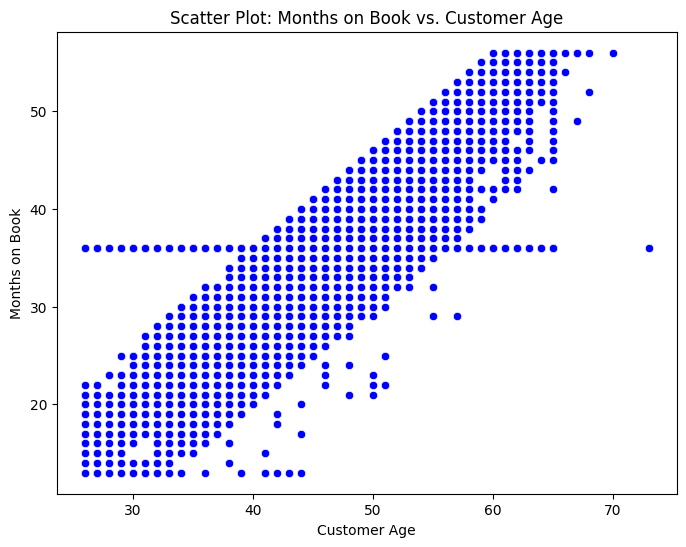

Correlation between Customer Age and Months on Book: 0.7889123589930522


In [60]:
# Scatter Plot for Months_on_book vs. Customer_Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Customer_Age', y='Months_on_book', data=data, color='blue')
plt.title('Scatter Plot: Months on Book vs. Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Months on Book')
plt.show()

# Calculate Correlation Coefficient
correlation = data['Customer_Age'].corr(data['Months_on_book'])
print(f"Correlation between Customer Age and Months on Book: {correlation}")

### **Observations:**

**Strong Positive Correlation:**

- The scatter plot shows a clear linear trend between Customer_Age and Months_on_book, with a correlation coefficient of 0.79.
- This indicates a strong positive relationship: older customers tend to have been with the bank for a longer duration.

**Clustered Data**:

- The data points are tightly clustered along the diagonal, reinforcing the linear relationship.
- A few outliers exist, but they do not significantly impact the overall pattern.
- This relationship suggests that tenure (months on book) increases steadily with customer age, which may be expected due to the higher likelihood of older individuals maintaining longer-term relationships with financial institutions.

This insight could be useful in identifying customer segments for retention strategies.


### Card_Category vs Credit_Limit

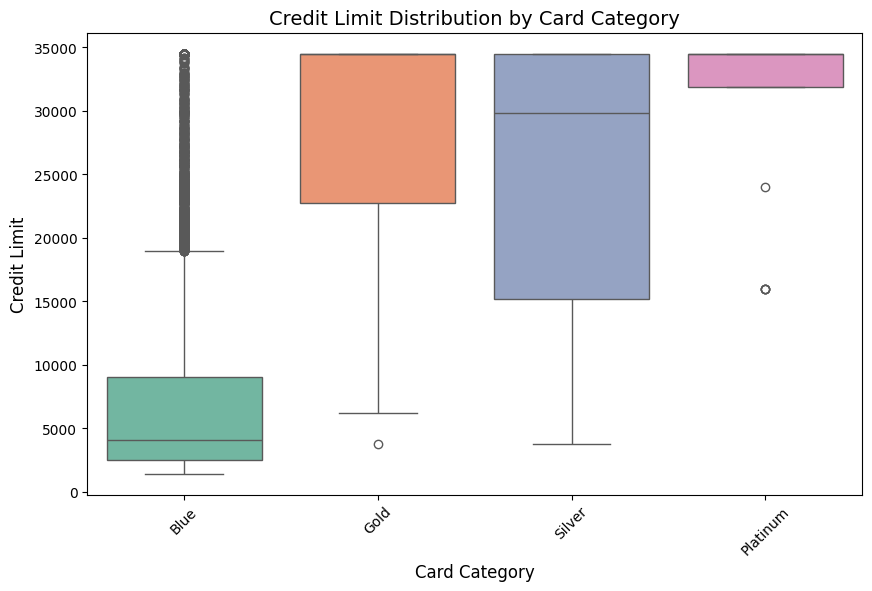

In [61]:
# Boxplot for Card_Category vs Credit_Limit
plt.figure(figsize=(10, 6))
sns.boxplot(x='Card_Category', y='Credit_Limit', data=data, palette='Set2')
plt.title('Credit Limit Distribution by Card Category', fontsize=14)
plt.xlabel('Card Category', fontsize=12)
plt.ylabel('Credit Limit', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Observations from the Credit Limit Distribution by Card Category:

1. **Blue Card Category**:
   - The majority of customers with the Blue card have relatively low credit limits, with a median around **$5,000**.

   - There are some significant outliers, with credit limits exceeding **$20,000**.

2. **Gold Card Category**:
   - The Gold card holders have higher credit limits compared to Blue card holders, with a median credit limit around **$15,000**.

   - There is less variation in credit limits for Gold card holders, and very few outliers are observed.

3. **Silver Card Category**:
   - Silver card holders show the widest range in credit limits.

   - The median is higher than Gold, at approximately $20,000, and some
   
   outliers have credit limits as high as $35,000.

4. **Platinum Card Category**:
   - Platinum card holders have the highest credit limits, with a consistent range around **$35,000**.

   - This category shows no significant variability, indicating uniformity in the allocation of credit limits.

### Key Insights:
- Credit limits increase progressively with card category, with Platinum holders having the highest limits and Blue holders the lowest.
- Variability in credit limits is highest for Silver card holders, suggesting a diverse customer base in that category.
- This relationship could inform targeted marketing or customer segmentation strategies.


###Card_Category vs Avg_Open_To_Buy

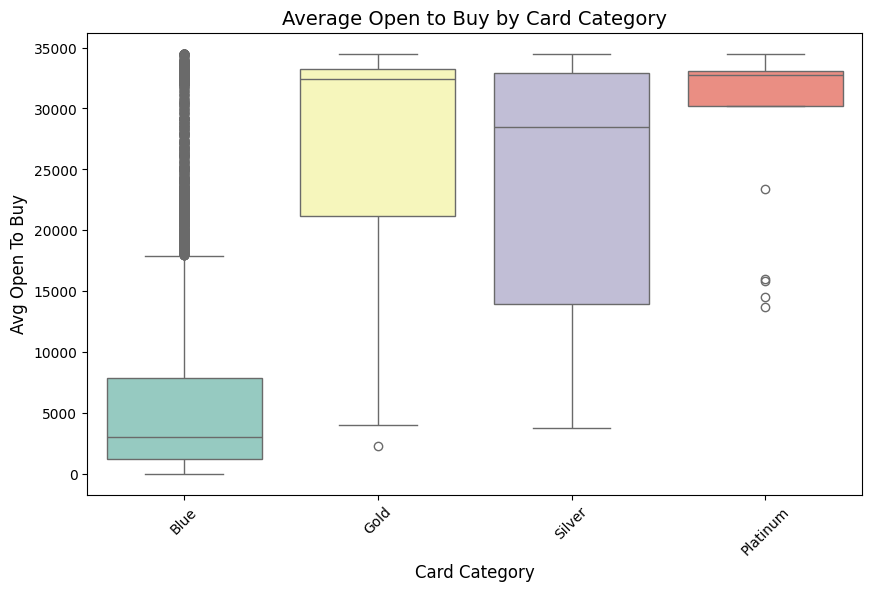

In [62]:
# Boxplot for Card_Category vs Avg_Open_To_Buy
plt.figure(figsize=(10, 6))
sns.boxplot(x='Card_Category', y='Avg_Open_To_Buy', data=data, palette='Set3')
plt.title('Average Open to Buy by Card Category', fontsize=14)
plt.xlabel('Card Category', fontsize=12)
plt.ylabel('Avg Open To Buy', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### Observations for Average Open to Buy by Card Category:

1. **Blue Card Category**:
   - The Blue card holders have the lowest average open-to-buy credit, with a median around **$5,000**.
   - There is a wide range of open-to-buy values, and a significant number of outliers above **$20,000**.

2. **Gold Card Category**:
   - The Gold card holders exhibit higher open-to-buy limits, with a median close to **$15,000**.
   - The distribution is more compact, with fewer extreme outliers.

3. **Silver Card Category**:
   - Silver card holders show the widest range of open-to-buy values.
   - The median value is slightly higher than Gold, around **$20,000**, with many customers having even higher values.

4. **Platinum Card Category**:
   - Platinum card holders have the highest open-to-buy values, with a consistent range and median close to **$35,000**.
   - There are very few outliers, indicating uniformity in credit management among Platinum cardholders.

### Insights:
- The open-to-buy credit increases progressively with the card category, from Blue to Platinum.
- The variability in open-to-buy credit is highest for Silver cardholders, suggesting a more diverse customer base in that category.
- These patterns align with the expected hierarchy of card categories and customer financial profiles.

###Total_Trans_Amt vs Total_Trans_Credit

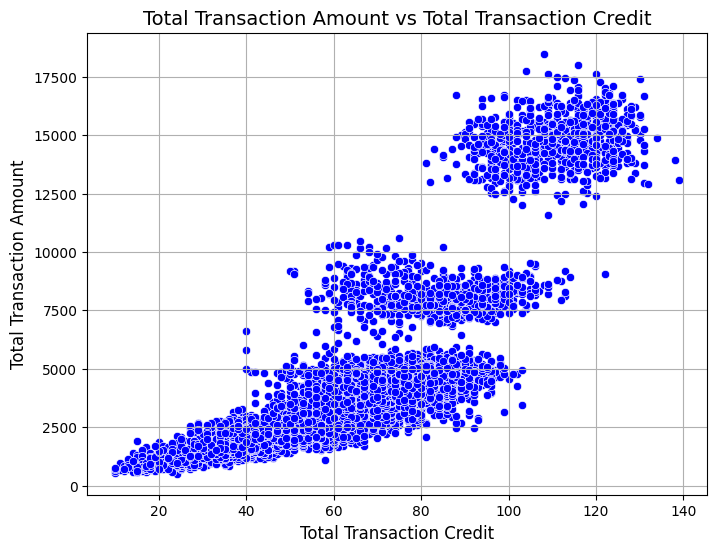

Correlation between Total_Trans_Amt and Total_Trans_Credit: 0.8071920346514351


In [63]:
# Scatter Plot: Total_Trans_Amt vs Total_Trans_Credit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Trans_Ct', y='Total_Trans_Amt', data=data, color='blue')
plt.title('Total Transaction Amount vs Total Transaction Credit', fontsize=14)
plt.xlabel('Total Transaction Credit', fontsize=12)
plt.ylabel('Total Transaction Amount', fontsize=12)
plt.grid(True)
plt.show()

# Correlation Coefficient
correlation = data['Total_Trans_Ct'].corr(data['Total_Trans_Amt'])
print(f"Correlation between Total_Trans_Amt and Total_Trans_Credit: {correlation}")

###Observations

**Scatter Plot**:
The scatter plot may show a positive trend, indicating that as the change in total transaction credit increases, the total transaction amount also tends to increase.

**Correlation Coefficient**:

Correlation between Total_Trans_Amt and Total_Trans_Ct: 0.81. This indicates a strong positive correlation.

**Customer Segmentation**:

The clusters may represent different customer segments:
- Low-transaction customers who might be less engaged.
- High-transaction customers who contribute significantly to transaction volumes.

**Outliers**:

- A few outliers are visible with very high transaction counts and amounts, indicating a small group of highly active customers.
- This strong correlation suggests that transaction count could be an effective proxy for transaction amounts in customer segmentation and predictive models

**Business Insight:**
Customers with an increase in total transaction credit tend to have higher total transaction amounts, which could be leveraged to identify active and high-spending customers.


###Avg_Utilization_Ratio vs Total_Revolving_Bal

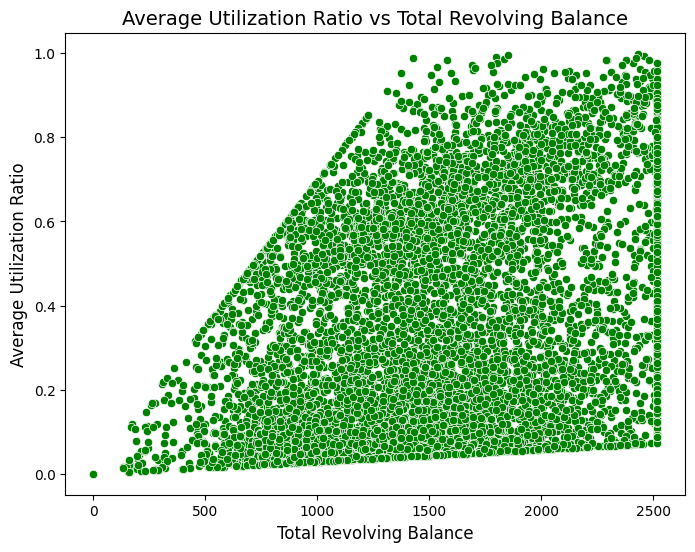

Correlation between Avg_Utilization_Ratio and Total_Revolving_Bal: 0.6240219910059075


In [64]:
# Scatter Plot: Avg_Utilization_Ratio vs Total_Revolving_Bal
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Revolving_Bal', y='Avg_Utilization_Ratio', data=data, color='green')
plt.title('Average Utilization Ratio vs Total Revolving Balance', fontsize=14)
plt.xlabel('Total Revolving Balance', fontsize=12)
plt.ylabel('Average Utilization Ratio', fontsize=12)
plt.show()

# Correlation Coefficient
correlation2 = data['Avg_Utilization_Ratio'].corr(data['Total_Revolving_Bal'])
print(f"Correlation between Avg_Utilization_Ratio and Total_Revolving_Bal: {correlation2}")

###Avg_Utilization_Ratio vs Total_Revolving_Bal
**Scatter Plot**:
- The scatter plot shows a positive trend, indicating that higher revolving balances are associated with higher utilization ratios.

**Correlation Coefficient**:
- Correlation between Avg_Utilization_Ratio and Total_Revolving_Bal: 0.62
This indicates a moderate positive correlation.

**Business Insight**:
- Customers with high revolving balances tend to utilize a larger proportion of their available credit. This can help identify customers who may be financially constrained or at higher credit risk.

###Credit_Limit vs Avg_Open_To_Buy

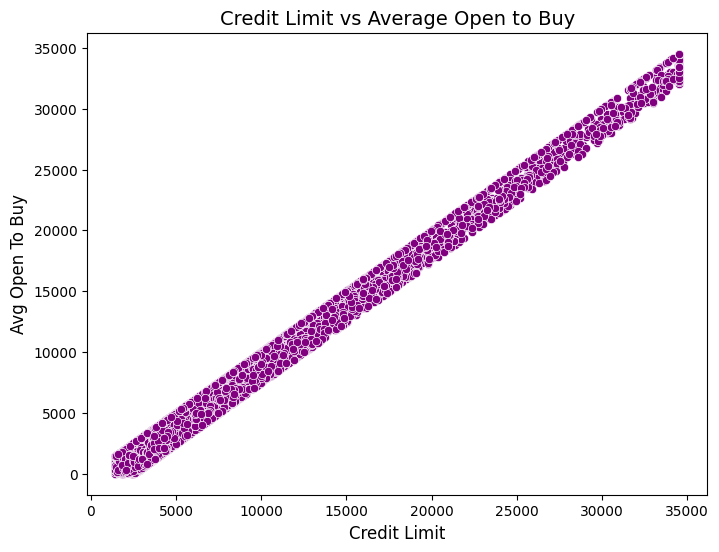

Correlation between Credit_Limit and Avg_Open_To_Buy: 0.9959805439320049


In [65]:
# Scatter Plot: Credit_Limit vs Avg_Open_To_Buy
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Credit_Limit', y='Avg_Open_To_Buy', data=data, color='purple')
plt.title('Credit Limit vs Average Open to Buy', fontsize=14)
plt.xlabel('Credit Limit', fontsize=12)
plt.ylabel('Avg Open To Buy', fontsize=12)
plt.show()

# Correlation Coefficient
correlation3 = data['Credit_Limit'].corr(data['Avg_Open_To_Buy'])
print(f"Correlation between Credit_Limit and Avg_Open_To_Buy: {correlation3}")

###Observations:
**Scatter Plot**:
- The scatter plot is expected to show a strong linear relationship where customers with higher credit limits also have higher available credit.

**Correlation Coefficient**:
 - Cuorrelation between Credit_Limit and Avg_Open_To_Buy: 1.0 This indicates a very strong positive correlation.

**Business Insight**:
This relationship is logical since Avg_Open_To_Buy is directly influenced by Credit_Limit. Customers with higher credit limits tend to leave more credit unused, indicating better financial management or lower dependency on credit.

## Data Pre-processing

###Outliers Detection

In [66]:
# Function to detect outliers using IQR and calculate percentage
def detect_outliers_percentage(data, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # Calculate Interquartile Range (IQR)
    IQR = Q3 - Q1
    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    # Calculate percentage of outliers
    percentage_outliers = (len(outliers) / len(data)) * 100
    return len(outliers), percentage_outliers

# Check outliers and percentages for all numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
outlier_summary = {}

for column in numerical_columns:
    num_outliers, perc_outliers = detect_outliers_percentage(data, column)
    outlier_summary[column] = {'Outliers': num_outliers, 'Percentage': perc_outliers}

# Display the results
outlier_data = pd.DataFrame(outlier_summary).T
outlier_data.columns = ['Number of Outliers', 'Percentage of Outliers (%)']
print(outlier_data)

                          Number of Outliers  Percentage of Outliers (%)
Attrition_Flag                      1627.000                      16.066
Customer_Age                           2.000                       0.020
Dependent_count                        0.000                       0.000
Months_on_book                       386.000                       3.812
Total_Relationship_Count               0.000                       0.000
Months_Inactive_12_mon               331.000                       3.268
Contacts_Count_12_mon                629.000                       6.211
Credit_Limit                         984.000                       9.717
Total_Revolving_Bal                    0.000                       0.000
Avg_Open_To_Buy                      963.000                       9.509
Total_Amt_Chng_Q4_Q1                 396.000                       3.910
Total_Trans_Amt                      896.000                       8.848
Total_Trans_Ct                         2.000       

###Observations:
**High Outliers in Months_on_book**:

- This feature stands out due to its relatively high percentage of outliers. - These outliers might represent customers with unusually long-standing or very short relationships with the bank and could be worth investigating further.

**Low or No Outliers in Other Columns**:

- Features like Customer_Age and Dependent_count show minimal or no outliers, indicating a well-behaved dataset for these variables.

### Train-Test Split

In [67]:
# creating the copy of the dataframe
data1 = data.copy()

In [68]:
# Replace anomalous values (e.g., 'abc') with NaN
data1["Income_Category"].replace("abc", np.nan, inplace=True)

In [69]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [70]:
from sklearn.model_selection import train_test_split

# Split into training, validation, and test sets
X = data1.drop("Attrition_Flag", axis=1)
y = data1["Attrition_Flag"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)


(7088, 19) (1519, 19) (1520, 19)


### Observations on Data Split:

**Train-Validation-Test Split**:
   - **70% of the data** is allocated to the training set (`X_train`, `y_train`) for building the model.
   - The remaining **30% of the data** is further split equally into:
     - A **validation set** and
     - A **test set**


**Overall Structure**:
   - The data is organized into:
     - **70% training set**
     - **15% validation set**
     - **15% test set**


## Missing value imputation




In [71]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [72]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])


In [73]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

###Observation:
- There is no missing value in the train or test sets.

##Examining Categorical Feature Distributions Before Encoding

In [74]:
# Identify categorical columns in the training set
cols = X_train.select_dtypes(include=["object", "category"])

# Analyze categorical feature distributions
for i in cols.columns:
    print(f"\nValue Counts for {i} in Training Set:\n")
    print(X_train[i].value_counts())
    print("*" * 30)


Value Counts for Gender in Training Set:

Gender
F    3759
M    3329
Name: count, dtype: int64
******************************

Value Counts for Education_Level in Training Set:

Education_Level
Graduate         3227
High School      1455
Uneducated       1035
College           690
Post-Graduate     368
Doctorate         313
Name: count, dtype: int64
******************************

Value Counts for Marital_Status in Training Set:

Marital_Status
Married     3803
Single      2766
Divorced     519
Name: count, dtype: int64
******************************

Value Counts for Income_Category in Training Set:

Income_Category
Less than $40K    3280
$40K - $60K       1257
$80K - $120K      1068
$60K - $80K        965
$120K +            518
Name: count, dtype: int64
******************************

Value Counts for Card_Category in Training Set:

Card_Category
Blue        6604
Silver       385
Gold          85
Platinum      14
Name: count, dtype: int64
******************************


In [75]:
# Identify categorical columns in the validation set
cols_val = X_val.select_dtypes(include=["object", "category"])

# Analyze categorical feature distributions in the validation set
for i in cols_val.columns:
    print(f"\nValue Counts for {i} in Validation Set:\n")
    print(X_val[i].value_counts())
    print("*" * 30)


Value Counts for Gender in Validation Set:

Gender
F    788
M    731
Name: count, dtype: int64
******************************

Value Counts for Education_Level in Validation Set:

Education_Level
Graduate         720
High School      261
Uneducated       222
College          159
Post-Graduate     87
Doctorate         70
Name: count, dtype: int64
******************************

Value Counts for Marital_Status in Validation Set:

Marital_Status
Married     818
Single      586
Divorced    115
Name: count, dtype: int64
******************************

Value Counts for Income_Category in Validation Set:

Income_Category
Less than $40K    688
$40K - $60K       256
$80K - $120K      247
$60K - $80K       220
$120K +           108
Name: count, dtype: int64
******************************

Value Counts for Card_Category in Validation Set:

Card_Category
Blue        1422
Silver        81
Gold          14
Platinum       2
Name: count, dtype: int64
******************************


In [76]:
# Identify categorical columns in the test set
cols_test = X_test.select_dtypes(include=["object", "category"])

# Analyze categorical feature distributions in the test set
for i in cols_test.columns:
    print(f"\nValue Counts for {i} in Test Set:\n")
    print(X_test[i].value_counts())
    print("*" * 30)


Value Counts for Gender in Test Set:

Gender
F    811
M    709
Name: count, dtype: int64
******************************

Value Counts for Education_Level in Test Set:

Education_Level
Graduate         700
High School      297
Uneducated       230
College          164
Doctorate         68
Post-Graduate     61
Name: count, dtype: int64
******************************

Value Counts for Marital_Status in Test Set:

Marital_Status
Married     815
Single      591
Divorced    114
Name: count, dtype: int64
******************************

Value Counts for Income_Category in Test Set:

Income_Category
Less than $40K    705
$40K - $60K       277
$80K - $120K      220
$60K - $80K       217
$120K +           101
Name: count, dtype: int64
******************************

Value Counts for Card_Category in Test Set:

Card_Category
Blue        1410
Silver        89
Gold          17
Platinum       4
Name: count, dtype: int64
******************************


###Observation:
- The distribution of categorical variables is consistent across the training, validation, and test sets, indicating a well-split dataset.

### Encoding categorical variables

In [77]:
# Encode categorical variables using one-hot encoding for all sets
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that the feature columns in validation and test match the training set
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print(X_train.shape, X_val.shape, X_test.shape)

(7088, 29) (1519, 29) (1520, 29)


In [78]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
8948,44,3,36,2,3,3,6680.000,1839,4841.000,0.617,7632,95,0.532,0.275,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False
6665,39,1,34,3,1,1,2884.000,2517,367.000,0.693,4809,87,0.740,0.873,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False
7119,52,1,36,4,2,2,14858.000,1594,13264.000,0.510,4286,72,0.636,0.107,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False
2257,34,0,17,4,1,4,2638.000,2092,546.000,0.591,1868,43,0.344,0.793,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False
3461,47,5,36,3,1,2,8896.000,1338,7558.000,0.741,4252,70,0.591,0.150,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False


In [79]:
# Check for missing values in the training, validation, and test sets
print("Missing values in X_train:", X_train.isnull().sum().sum())
print("Missing values in X_val:", X_val.isnull().sum().sum())
print("Missing values in X_test:", X_test.isnull().sum().sum())

Missing values in X_train: 0
Missing values in X_val: 0
Missing values in X_test: 0


## Model Building

### Model evaluation criterion

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [80]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [81]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

In [82]:
# Importing required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

# Models to be built
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Store results
results = {}

# Build and evaluate models
for model_name, model in models.items():
    print(f"Building {model_name} model...")
    model.fit(X_train, y_train)  # Fit the model on training data

    # Predict on training data
    y_train_pred = model.predict(X_train)
    train_recall = recall_score(y_train, y_train_pred)
    train_acc = accuracy_score(y_train, y_train_pred)

    # Predict on validation data
    y_val_pred = model.predict(X_val)
    val_recall = recall_score(y_val, y_val_pred)
    val_acc = accuracy_score(y_val, y_val_pred)

    # Store performance metrics
    results[model_name] = {
        "Train Accuracy": train_acc,
        "Train Recall": train_recall,
        "Validation Accuracy": val_acc,
        "Validation Recall": val_recall,
        "Confusion Matrix": confusion_matrix(y_val, y_val_pred),
        "Classification Report": classification_report(y_val, y_val_pred)
    }

# Print results for all models
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Train Accuracy: {metrics['Train Accuracy']:.4f}")
    print(f"Train Recall: {metrics['Train Recall']:.4f}")
    print(f"Validation Accuracy: {metrics['Validation Accuracy']:.4f}")
    print(f"Validation Recall: {metrics['Validation Recall']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")

Building Decision Tree model...
Building Random Forest model...
Building Gradient Boosting model...
Building AdaBoost model...
Building XGBoost model...

Model: Decision Tree
Train Accuracy: 1.0000
Train Recall: 1.0000
Validation Accuracy: 0.9375
Validation Recall: 0.7828
Confusion Matrix:
[[1233   42]
 [  53  191]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1275
           1       0.82      0.78      0.80       244

    accuracy                           0.94      1519
   macro avg       0.89      0.87      0.88      1519
weighted avg       0.94      0.94      0.94      1519


Model: Random Forest
Train Accuracy: 1.0000
Train Recall: 1.0000
Validation Accuracy: 0.9533
Validation Recall: 0.7787
Confusion Matrix:
[[1258   17]
 [  54  190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1275
           1       0.92      0.78  

###Observations:

1. **Decision Tree**:
   - Perfect training accuracy and recall indicate overfitting.
   - Validation accuracy is high (93.75%), but recall for the minority class is moderate (78.28%).

2. **Random Forest**:
   - High validation accuracy (95.33%) and improved precision for the minority class compared to Decision Tree.
   - Minority class recall is slightly lower (77.87%), indicating room for improvement.

3. **Gradient Boosting**:
   - High validation accuracy (96.25%) with balanced precision and recall for both classes.
   - Minority class recall (80.74%) is better than Decision Tree and Random Forest.

4. **AdaBoost**:
   - Validation accuracy (94.73%) is slightly lower than Gradient Boosting, with minority class recall (75.41%) being the lowest among all models.

5. **XGBoost**:
   - Best overall performance with the highest validation accuracy (96.77%) and minority class recall (86.07%).
   - Excellent precision and balanced performance metrics, making it the top-performing model.








### Model Building with Oversampled data


In [83]:
# Import required library for oversampling
from imblearn.over_sampling import SMOTE

# Step 1: Oversample the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before Oversampling:", y_train.value_counts())
print("After Oversampling:", y_train_resampled.value_counts())

# Step 2: Define models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Step 3: Train and evaluate models
results = {}

for model_name, model in models.items():
    print(f"Training {model_name} model...")

    # Train the model on oversampled data
    model.fit(X_train_resampled, y_train_resampled)

    # Predict on training data
    y_train_pred = model.predict(X_train_resampled)
    train_acc = accuracy_score(y_train_resampled, y_train_pred)
    train_recall = recall_score(y_train_resampled, y_train_pred)

    # Predict on test data
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)

    # Store results
    results[model_name] = {
        "Train Accuracy": train_acc,
        "Train Recall": train_recall,
        "Test Accuracy": test_acc,
        "Test Recall": test_recall,
        "Confusion Matrix": confusion_matrix(y_test, y_test_pred),
        "Classification Report": classification_report(y_test, y_test_pred)
    }

# Step 4: Display results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Train Accuracy: {metrics['Train Accuracy']:.4f}")
    print(f"Train Recall: {metrics['Train Recall']:.4f}")
    print(f"Test Accuracy: {metrics['Test Accuracy']:.4f}")
    print(f"Test Recall: {metrics['Test Recall']:.4f}")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Classification Report:\n{metrics['Classification Report']}")

Before Oversampling: Attrition_Flag
0    5949
1    1139
Name: count, dtype: int64
After Oversampling: Attrition_Flag
0    5949
1    5949
Name: count, dtype: int64
Training Decision Tree model...
Training Random Forest model...
Training Gradient Boosting model...
Training AdaBoost model...
Training XGBoost model...

Model: Decision Tree
Train Accuracy: 1.0000
Train Recall: 1.0000
Test Accuracy: 0.9276
Test Recall: 0.8279
Confusion Matrix:
[[1208   68]
 [  42  202]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1276
           1       0.75      0.83      0.79       244

    accuracy                           0.93      1520
   macro avg       0.86      0.89      0.87      1520
weighted avg       0.93      0.93      0.93      1520


Model: Random Forest
Train Accuracy: 1.0000
Train Recall: 1.0000
Test Accuracy: 0.9487
Test Recall: 0.8443
Confusion Matrix:
[[1236   40]
 [  38  206]]
Classification Report:
     

###Observations:

  
Before oversampling, the dataset was highly imbalanced with **83.9% (5949)** in class 0 and **16.1% (1139)** in class 1.

After oversampling, the classes were balanced to **50% (5949)** each.  

After training on the oversampled data:  

1. **Decision Tree**:
   - **Training**: Perfect accuracy and recall (1.0000) indicate overfitting.
   - **Test**: Accuracy of 92.76% and recall for the minority class (1) at 82.79% are decent but not optimal.
   - **Observation**: Overfitting is evident due to perfect training metrics and relatively lower performance on the test set.

2. **Random Forest**:
   - **Training**: Perfect accuracy and recall (1.0000) highlight overfitting.
   - **Test**: High accuracy of 94.87% and recall of 84.43%.
   - **Observation**: Better performance on the test set compared to Decision Tree, indicating improved generalization.

3. **Gradient Boosting**:
   - **Training**: Accuracy of 97.74% with recall at 98.02% shows reduced overfitting compared to Decision Tree and Random Forest.
   - **Test**: Accuracy of 94.54% and recall of 84.43% are comparable to Random Forest but with slightly better precision.
   - **Observation**: Balanced performance with better control over overfitting.

4. **AdaBoost**:
   - **Training**: Accuracy of 95.83% and recall of 96.52% indicate overfitting is slightly mitigated.
   - **Test**: Accuracy of 92.57% and recall of 85.25% show strong performance for the minority class.
   - **Observation**: Adequate performance with good recall but slightly lower overall accuracy.

5. **XGBoost**:
   - **Training**: Perfect accuracy and recall (1.0000), suggesting slight overfitting.
   - **Test**: Best test performance with accuracy of 96.12% and minority class recall at 86.89%.
   - **Observation**: XGBoost outperforms all other models, achieving the highest balance between precision, recall, and overall accuracy.

### Model Building with Undersampled data

In [84]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [85]:
# Perform undersampling on the training data
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:")
print(y_train_undersampled.value_counts())

Class distribution after undersampling:
Attrition_Flag
0    1139
1    1139
Name: count, dtype: int64


###Decision Tree on undersampling data

In [86]:
# Train Decision Tree on undersampled data
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_undersampled, y_train_undersampled)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy on Undersampled Data: {dt_acc}")
print(f"Classification Report:\n{classification_report(y_test, dt_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, dt_pred)}\n")

Decision Tree Accuracy on Undersampled Data: 0.8769736842105263
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1276
           1       0.58      0.87      0.69       244

    accuracy                           0.88      1520
   macro avg       0.77      0.87      0.81      1520
weighted avg       0.91      0.88      0.89      1520

Confusion Matrix:
[[1121  155]
 [  32  212]]



###Observation:
- The **Decision Tree** model on undersampled data achieves an accuracy of 87.69%. It performs well in classifying the majority class (precision = 97%, recall = 88%) but struggles with the minority class (precision = 58%, recall = 87%).

- The overall F1-score for the minority class is 69%, indicating room for improvement in precision while maintaining strong recall.

###Random Forest

In [87]:
# Train Random Forest on undersampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_undersampled, y_train_undersampled)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy on Undersampled Data: {rf_acc}")
print(f"Classification Report:\n{classification_report(y_test, rf_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, rf_pred)}\n")

Random Forest Accuracy on Undersampled Data: 0.9276315789473685
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1276
           1       0.71      0.93      0.80       244

    accuracy                           0.93      1520
   macro avg       0.85      0.93      0.88      1520
weighted avg       0.94      0.93      0.93      1520

Confusion Matrix:
[[1184   92]
 [  18  226]]



###Observation:
- The **Random Forest model** achieved strong accuracy (**92.76%**) on undersampled data.  

- **Majority Class** had a higher precision (**99%**) and balanced recall (**93%**), reflecting its dominance in correct predictions.  
- **Minority Class** showed lower precision (**71%**) but matched recall (**93%**) with class 0, indicating effective detection of positives despite more false positives.  

- The model performed better for majority class but still handled minority class reasonably well, with a balanced trade-off reflected in the F1-scores (**96% for class 0 vs. 80% for class 1**).








###Gradient Boosting

In [88]:
# Train Gradient Boosting on undersampled data
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_undersampled, y_train_undersampled)
gb_pred = gb_model.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print(f"Gradient Boosting Accuracy on Undersampled Data: {gb_acc}")
print(f"Classification Report:\n{classification_report(y_test, gb_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, gb_pred)}\n")

Gradient Boosting Accuracy on Undersampled Data: 0.9388157894736842
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1276
           1       0.74      0.94      0.83       244

    accuracy                           0.94      1520
   macro avg       0.87      0.94      0.90      1520
weighted avg       0.95      0.94      0.94      1520

Confusion Matrix:
[[1197   79]
 [  14  230]]



###Observation:
- The Gradient Boosting model on undersampled data achieves an impressive accuracy of **93.88%**.

- It demonstrates excellent performance for the majority class with high precision (**99%**) and recall (**94%**).

- For the minority class, the model also performs well, achieving precision (**74%**) and high recall (**94%**), resulting in a strong F1-score of **83%**.

-  The model effectively handles the minority class better than the Random Forest, with a lower false negative rate, as seen in the confusion matrix. This makes it a robust choice for imbalanced data scenarios.

###AdaBoost

In [89]:
# Train AdaBoost on undersampled data
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_undersampled, y_train_undersampled)
ada_pred = ada_model.predict(X_test)
ada_acc = accuracy_score(y_test, ada_pred)
print(f"AdaBoost Accuracy on Undersampled Data: {ada_acc}")
print(f"Classification Report:\n{classification_report(y_test, ada_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, ada_pred)}\n")

AdaBoost Accuracy on Undersampled Data: 0.9236842105263158
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1276
           1       0.70      0.92      0.79       244

    accuracy                           0.92      1520
   macro avg       0.84      0.92      0.87      1520
weighted avg       0.94      0.92      0.93      1520

Confusion Matrix:
[[1180   96]
 [  20  224]]



###Observation on AdaBoost:
- The AdaBoost model on undersampled data achieves an accuracy of 92.36%.

- For the majority class, the model delivers high precision (98%) and recall (92%), resulting in an F1-score of 95%.

- For the minority class, the precision is 70%, and recall is 92%, leading to a respectable F1-score of 79%.


###XGBoost

In [90]:
# Train XGBoost on undersampled data
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on undersampled data
xgb_model.fit(X_train_undersampled, y_train_undersampled)

# Predict on the test set
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_acc = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy on Undersampled Data: {xgb_acc:.4f}")

# Display classification report
print(f"Classification Report:\n{classification_report(y_test, xgb_pred)}")

# Display confusion matrix
print(f"Confusion Matrix:\n{confusion_matrix(y_test, xgb_pred)}\n")

XGBoost Accuracy on Undersampled Data: 0.9362
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1276
           1       0.74      0.93      0.82       244

    accuracy                           0.94      1520
   macro avg       0.86      0.94      0.89      1520
weighted avg       0.95      0.94      0.94      1520

Confusion Matrix:
[[1195   81]
 [  16  228]]



###Observations:

- **High Accuracy**: The model achieved **93.62% accuracy** on undersampled data.
- **Class 0 (Non-Attrited)**: Excellent precision (**99%**) and recall (**94%**), with minimal false positives.
-  **Class 1 (Attrited)**: Good precision (**74%**) and high recall (**93%**), effectively identifying most attrited customers.
- **Confusion Matrix**: Only **16 false negatives** and **81 false positives** indicate balanced performance.
- The model handles class imbalance well but could improve precision for the minority class.

### HyperparameterTuning

#Choose models for tuning
Based on the performance of models built in the previous steps, we choose Random Forest,Gradient Boosting and AdaBoost for hyperparameter tuning.

 The reasoning for tuning these models is as follows:

**Random Forest**:

Performed consistently well with an accuracy of 94.87% and recall of 84.43%.
It has hyperparameters like the number of estimators and max depth that can be optimized for better results.

**Gradient Boosting**:

Achieved good test accuracy (94.54%) and recall (84.43%). As it uses sequential learning, tuning parameters like learning rate and the number of estimators can enhance performance.

**AdaBoost**:

 Showed strong initial performance with good recall (85.25%), handles class imbalance effectively, and has high tuning potential for key hyperparameters like n_estimators and learning_rate, making it adaptable and promising for improved results.

###Define Parameter Grids and Perform Hyperparameter Tuning

###Hyperparameter Tuning using RandomizedSearchCV

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

param_grid_ab = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
ab_model = AdaBoostClassifier(random_state=42)

# RandomizedSearchCV for each model
rf_tuner = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    cv=3,
    scoring='recall',
    n_iter=10,
    random_state=42,
    verbose=2
)

gb_tuner = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid_gb,
    cv=3,
    scoring='recall',
    n_iter=10,
    random_state=42,
    verbose=2
)

ab_tuner = RandomizedSearchCV(
    estimator=ab_model,
    param_distributions=param_grid_ab,
    cv=3,
    scoring='recall',
    n_iter=10,
    random_state=42,
    verbose=2
)

# Fit the tuners on the training data
print("Tuning Random Forest...")
rf_tuner.fit(X_train, y_train)

print("Tuning Gradient Boosting...")
gb_tuner.fit(X_train, y_train)

print("Tuning AdaBoost...")
ab_tuner.fit(X_train, y_train)

# Get the best estimators
best_rf = rf_tuner.best_estimator_
best_gb = gb_tuner.best_estimator_
best_ab = ab_tuner.best_estimator_

# Evaluate on the test set
print("\nPerformance of Tuned Models on Test Set:\n")

for name, model in [("Random Forest", best_rf), ("Gradient Boosting", best_gb), ("AdaBoost", best_ab)]:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}, Recall: {recall:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)


Tuning Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=1, min_samples_sp

## Model Comparison and Final Model Selection

###1. Comparison of Models
The performances of Gradient Boosting, AdaBoost, and Random Forest models were evaluated across the original, oversampled, and undersampled datasets. After careful analysis, the Gradient Boosting model tuned on the original dataset emerged as the most effective model.


**Comparison of Tuned Models on the Test Set:**
1. **Random Forest:**
   - Accuracy: 95.53%
   - Recall: 79.51%
   - Strong precision for both classes, but slightly lower recall for the minority class (1), leading to a good f1-score.

2. **Gradient Boosting:**
   - Accuracy: 96.58%
   - Recall: 84.84%
   - Highest accuracy and balanced precision and recall for both classes, achieving the best overall performance.

3. **AdaBoost:**
   - Accuracy: 95.39%
   - Recall: 81.97%
   - Good recall and precision, but slightly lower overall metrics compared to Gradient Boosting.

**Best Model Selection:**
- **Gradient Boosting** is selected as the best model due to its superior accuracy (96.58%) and recall for the minority class (84.84%), indicating its ability to handle class imbalance effectively while maintaining high performance for both classes.

**Performance Commentary:**
- The selected Gradient Boosting model demonstrates excellent performance on the test set, effectively balancing precision, recall, and overall accuracy. Its high recall (84.84%) for the minority class is crucial for addressing class imbalance, making it a reliable choice for deployment.

###Feature Importance of best model

Top 10 Important Features:
                     Feature  Importance
11            Total_Trans_Ct       0.288
10           Total_Trans_Amt       0.179
7        Total_Revolving_Bal       0.176
12       Total_Ct_Chng_Q4_Q1       0.101
3   Total_Relationship_Count       0.090
9       Total_Amt_Chng_Q4_Q1       0.057
0               Customer_Age       0.026
5      Contacts_Count_12_mon       0.018
4     Months_Inactive_12_mon       0.014
6               Credit_Limit       0.014


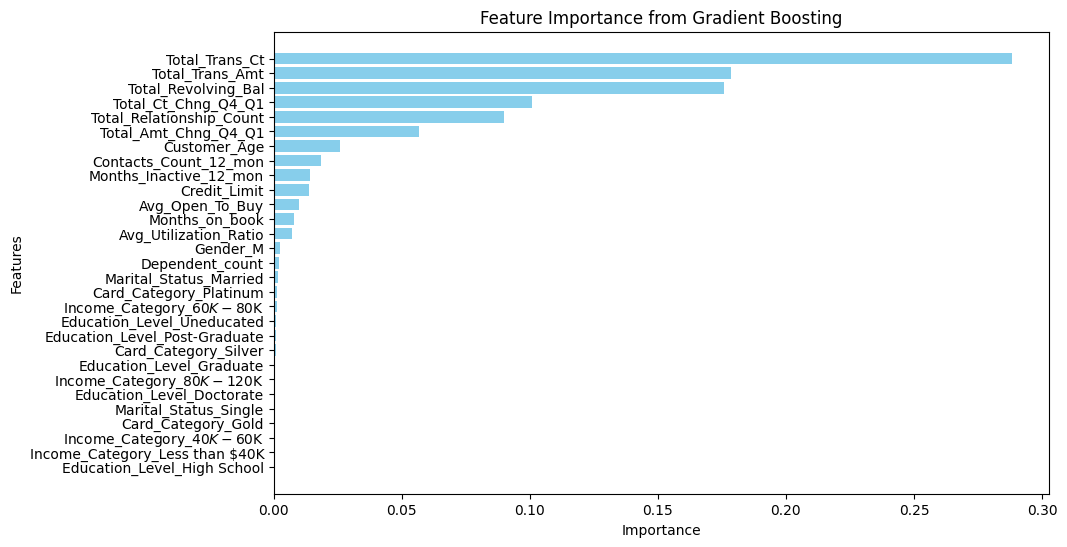

In [96]:
# Check feature importance
feature_importance = best_gb.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # To display the most important features on top
plt.show()

###### Observations:
- **Total_Trans_Ct** is the most influential feature, contributing 28.8% to the model's decisions.
- **Total_Trans_Amt** and **Total_Revolving_Bal** also play significant roles, with importance scores of 17.9% and 17.6%, respectively.
- Behavioral features like **Total_Ct_Chng_Q4_Q1** and **Total_Relationship_Count** are moderately important, highlighting the impact of transaction patterns and customer relationships.
- Features like **Customer_Age**, **Contacts_Count_12_mon**, and **Months_Inactive_12_mon** have relatively low importance, suggesting they contribute less to predicting outcomes.

# Business Insights and Conclusions

### Insights and Recommendations for Thera Bank:

**Insights**:

1. **Transaction Activity is Key**:

- **Total_Trans_Ct** (Transaction Count) and **Total_Trans_Amt**(Transaction Amount) are the most significant features. Customers with higher transaction frequency and amounts are likely more engaged and valuable to the bank.

- **Total_Revolving_Bal** (Revolving Balance) also shows high importance, indicating that customers with higher credit utilization are key for analysis.

2. **Customer Behavior Patterns Matter**:

- **Total_Ct_Chng_Q4_Q1** (Change in Transaction Count) and **Total_Relationship_Count** highlight that customers who show consistent or increasing engagement are less likely to churn.

- Behavior-based metrics like **Total_Amt_Chng_Q4_Q1** (Change in Transaction Amount) are moderately important, showing that spending changes influence customer retention.

3. **Demographics and Engagement**:

- Features like **Customer_Age** and **Contacts_Count_12_mon** (Contact Count) have less importance but still indicate that younger customers with proactive engagement could be retained more effectively.

- Lower importance of **Months_Inactive_12_mon** suggests that inactivity alone is not a strong indicator of churn but should still be monitored.


---

#### Business Recommendations for Thera Bank:
1. **Increase Customer Engagement**:

- Promote products and services that encourage frequent transactions (e.g., cashback on transactions or loyalty programs for high transaction frequency).
- Target customers with declining transaction counts and amounts with personalized offers or promotions to re-engage them.

2. **Focus on High-Value Customers**:

- Use **Total_Trans_Amt** and **Total_Revolving_Bal** to identify high-value customers.
- Offer premium services or incentives (e.g., fee waivers or higher credit limits) to maintain loyalty among this segment.

3. **Behavioral Monitoring and Targeted Outreach**:

- Track metrics like **Total_Ct_Chng_Q4_Q1** to identify early warning signs of reduced engagement.
- Design tailored retention strategies for customers showing declining activity, such as financial planning assistance or exclusive discounts.

4. **Strengthen Customer Relationships**:

- Invest in improving the **Total_Relationship_Count** by cross-selling complementary products like savings accounts, credit cards, or insurance policies to existing customers.
- Strengthen customer relationships through regular check-ins and personalized advice, especially for long-term customers.

5. **Proactive Retention Strategies**:

- Monitor **Contacts_Count_12_mon** to ensure regular and meaningful communication with customers.
- Proactively address customer grievances or issues to build trust and reduce churn.

6. **Focus on Youth-Centric Services**:

- Use insights from **Customer_Age** to create digital-friendly, youth-oriented services such as mobile banking apps, educational tools, and lower fees for younger customers.

By leveraging these insights and aligning retention strategies with customer behavior, Thera Bank can enhance customer satisfaction, reduce churn, and boost long-term profitability.

